**Spotting the Fakes: A Deep Dive into Real vs. Fake Job Listings**

The Real Fake Job Posting project aims to develop a predictive model that can accurately identify real and fake job postings. Leveraging the dataset available on Kaggle, the 'Real or Fake JobPosting Prediction' dataset by Shivam Bansal, this project utilizes deep learning algorithms to analyze various features . By training the model on this extensive dataset, we aim to create a robust classifier that can effectively distinguish between legitimate and fraudulent job postings. 

Dataset link: https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction/code

**Problem Statement:**
The objective of this project is to develop a robust and accurate machine learning model that can classify job postings as either genuine or fake. With the increasing prevalence of online job platforms, there has been a surge in fake job postings that aim to deceive job seekers. These fraudulent postings not only waste the time and effort of applicants but can also pose risks to their personal information and financial security.

The challenge lies in effectively identifying fake job postings from a large corpus of diverse job descriptions. Traditional keyword-based approaches are often insufficient, as scammers become more sophisticated in their tactics. Therefore, the project aims to leverage Natural Language Processing (NLP) techniques, including both traditional and advanced methods, to extract meaningful features from job postings and develop a classification model capable of accurately distinguishing between genuine and fake job ads.

The key components of the project include:

- Data Collection and Preprocessing: Acquire a comprehensive dataset of job postings, consisting of both genuine and fake examples. Perform necessary data preprocessing steps such as cleaning, normalization, and removal of irrelevant information.

- Feature Extraction: Utilize NLP techniques such as Bag-of-Words (CBOW), Skip-gram, and word embeddings to extract relevant features from the textual content of job postings. These techniques will capture the semantic information, context, and relationships between words.

- Model Development: Design and train a variety of machine learning models to classify job postings. Explore different architectures, including traditional models such as LSTM (Long Short-Term Memory) and advanced models such as BERT (Bidirectional Encoder Representations from Transformers). Experiment with different activation functions, optimizers, learning rates, and kernel initializers to find the optimal configuration for each model.

- Performance Evaluation: Assess the performance of each model using appropriate evaluation metrics such as accuracy, precision, recall, and F1-score. Conduct thorough testing on a separate validation dataset to measure the models' effectiveness in distinguishing between genuine and fake job postings.

The project will also showcase the effectiveness of various NLP techniques, including CBOW, Skip-gram, LSTM, and BERT, in solving real-world classification problems.

**Import Necessary Libraries**

In [1]:
!pip install transformers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from transformers import BertForSequenceClassification, BertTokenizer
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import RobertaTokenizer, TFRobertaForSequenceClassification
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from transformers import AdamW
from tqdm import tqdm
from gensim.models import KeyedVectors
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.initializers import HeNormal, GlorotNormal
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.initializers import HeNormal, GlorotNormal
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from wordcloud import WordCloud
from tensorflow.keras.initializers import glorot_uniform


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.7 MB/s eta 0:00:00


**Reading Dataset**

In [2]:
df=pd.read_csv("fake_job_postings.csv")

In [3]:
df.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
# Displaying columns
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [5]:
# Display basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [6]:
# Generate descriptive statistics of numerical columns
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Displaying null values
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [8]:
import tensorflow as tf
tf.test.gpu_device_name()


''

**Filling missing values with appropriate methods and techniques**

In [9]:
# Handling missing values in meta-information columns
meta_columns = ['location', 'department', 'salary_range', 'company_profile', 'requirements', 'benefits',
                'employment_type', 'required_experience', 'required_education', 'industry', 'function']

# Imputing missing categorical values with the mode
df['employment_type'].fillna(df['employment_type'].mode()[0], inplace=True)
df['required_experience'].fillna(df['required_experience'].mode()[0], inplace=True)
df['required_education'].fillna(df['required_education'].mode()[0], inplace=True)
df['industry'].fillna(df['industry'].mode()[0], inplace=True)
df['function'].fillna(df['function'].mode()[0], inplace=True)

# Imputing missing numerical values with a placeholder
df['salary_range'].fillna('Not Mentioned', inplace=True)
# Imputing missing values in meta-information columns with a placeholder
df[meta_columns] = df[meta_columns].fillna('Not Available')

# Droping one null values row from the 'description' column
df.dropna(subset=['description'], axis=0, inplace=True)

# Print the updated DataFrame
df.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,Not Mentioned,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Not Available,0,1,0,Other,Internship,Bachelor's Degree,Information Technology and Services,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Not Mentioned,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Not Available,Not Mentioned,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Not Available,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Not Mentioned,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",Not Available,Not Mentioned,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [10]:
# Checking null values after handling them
df.isna().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [11]:
# Count the number of real and fake job postings
job_count = df['fraudulent'].value_counts()
print(job_count)

0    17014
1      865
Name: fraudulent, dtype: int64


In [12]:
# Remove the 'job_id' column as it is not necessary
df.drop('job_id', axis=1, inplace=True)

**Exploratory Data Analysis**

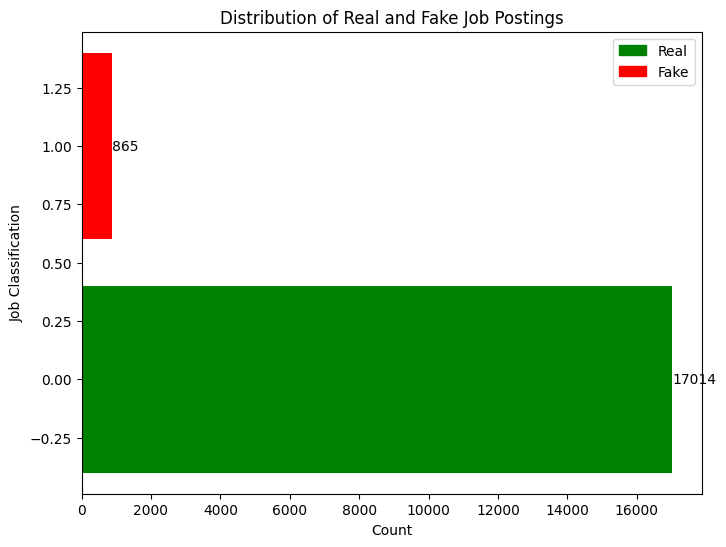

In [13]:
class_counts = df['fraudulent'].value_counts()
colors = ['green', 'red']

plt.figure(figsize=(8, 6))
plt.barh(class_counts.index, class_counts.values, color=colors)
plt.xlabel('Count')
plt.ylabel('Job Classification')
plt.title('Distribution of Real and Fake Job Postings')

# Add count labels
for i, count in enumerate(class_counts.values):
    plt.text(count + 20, i, str(count), va='center')

# Create a legend
legend_labels = ['Real', 'Fake']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(legend_handles, legend_labels)

plt.show()


- The visualization reveals that there are 17,014 instances of real job postings and 865 instances of fake job postings.

<ipython-input-14-69fea165626d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


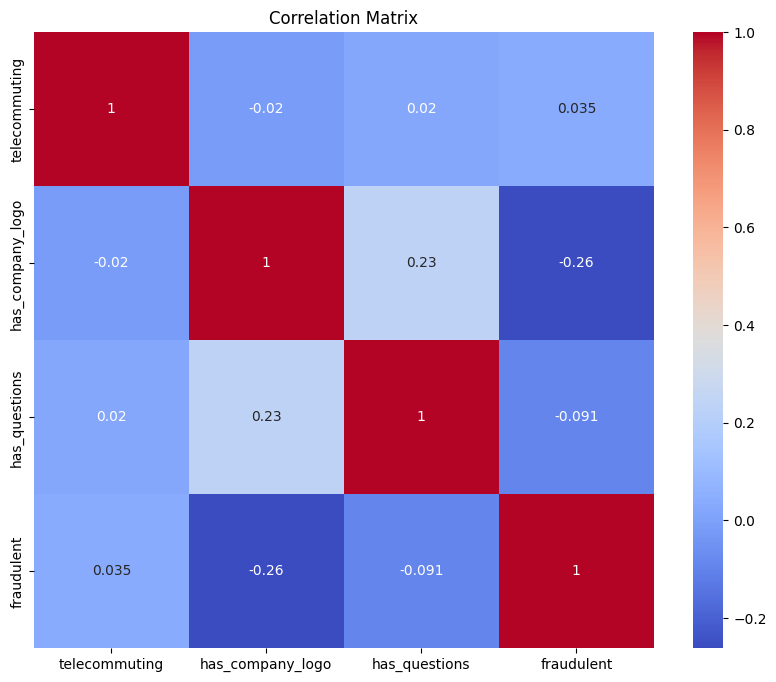

In [14]:
# Visualize the correlation matrix of numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


-  The observed correlation coefficients in this project indicate low correlations among the variables. This suggests a weak linear relationship between the variables under investigation. While this may limit the effectiveness of linear models for prediction, it also indicates relatively independent variables. Exploring other statistical measures, considering nonlinear relationships, and leveraging domain knowledge can provide a deeper understanding of the dataset's complex dynamics. 


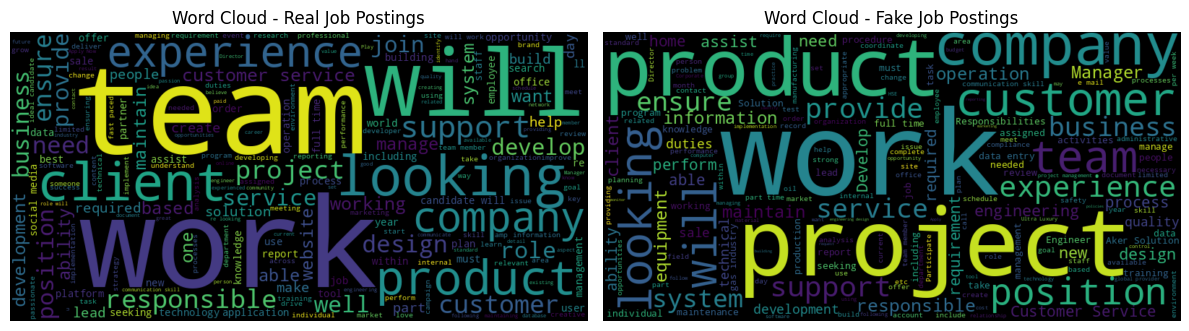

In [15]:
# EDA - Word Clouds

real_jobs_text = ' '.join(df[df['fraudulent'] == 0]['description'].dropna().values)
fake_jobs_text = ' '.join(df[df['fraudulent'] == 1]['description'].dropna().values)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
wordcloud_real = WordCloud(width=800, height=400).generate(real_jobs_text)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Word Cloud - Real Job Postings')
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_fake = WordCloud(width=800, height=400).generate(fake_jobs_text)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud - Fake Job Postings')
plt.axis('off')

plt.tight_layout()
plt.show()


- The above code generates word clouds to visually represent the most frequent words in the descriptions of real and fake job postings, providing an overview of the textual content in each category. Therefore, the visualized words in the word clouds correspond to the more frequent words in real job postings versus fake job postings.

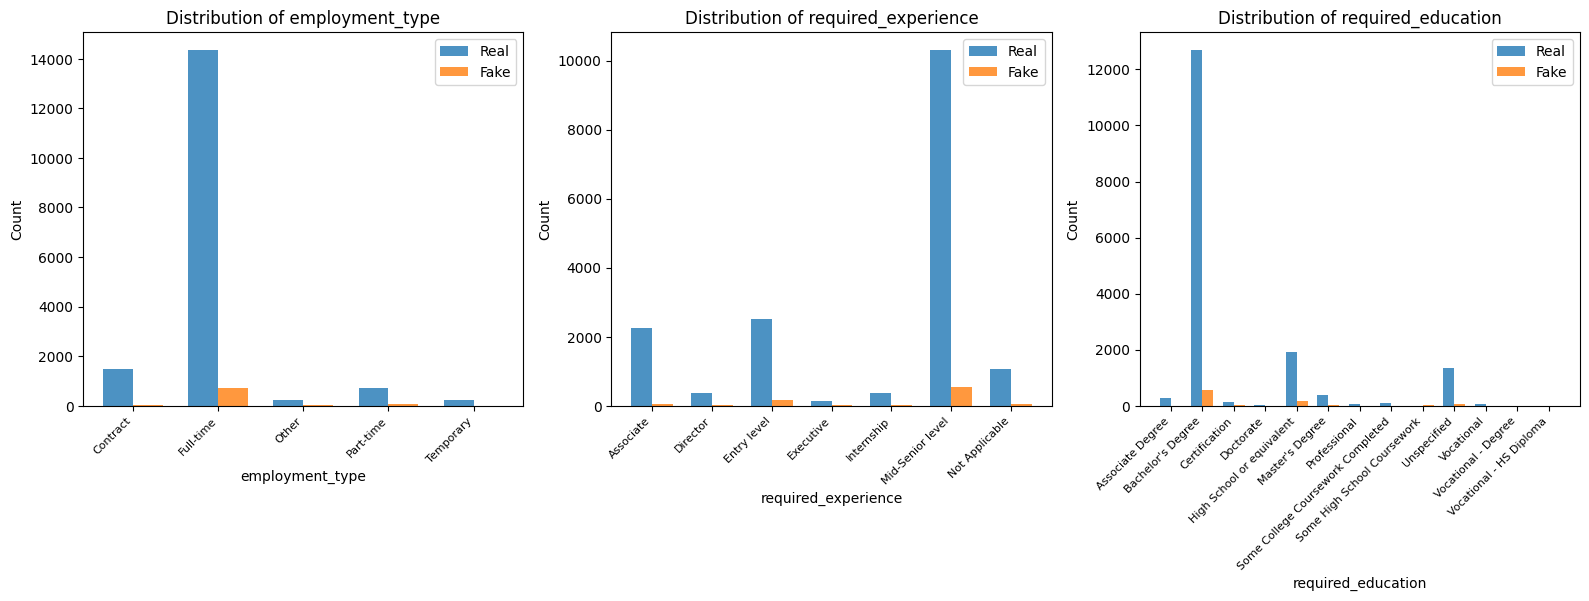

In [16]:
meta_columns = ['employment_type', 'required_experience', 'required_education']

plt.figure(figsize=(16, 10))
bar_width = 0.35
opacity = 0.8

for i, column in enumerate(meta_columns):
    real_counts = df[df['fraudulent'] == 0][column].value_counts()
    fake_counts = df[df['fraudulent'] == 1][column].value_counts()

    # Get unique categories and their counts
    categories = sorted(set(real_counts.index) | set(fake_counts.index))
    real_values = [real_counts.get(cat, 0) for cat in categories]
    fake_values = [fake_counts.get(cat, 0) for cat in categories]

    # Plotting the grouped bar chart
    ax = plt.subplot(2, 3, i+1)
    x = np.arange(len(categories))
    plt.bar(x, real_values, bar_width, alpha=opacity, label='Real')
    plt.bar(x + bar_width, fake_values, bar_width, alpha=opacity, label='Fake')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column}')
    plt.xticks(x + bar_width / 2, categories, rotation=45, ha='right', fontsize=8)  # Adjust rotation and font size
    plt.legend()

plt.tight_layout()
plt.show()


- The above visualization shows grouped bar charts to analyze the distribution of various categories within important meta columns, such as employment type, required experience, and required education, for real and fake job postings. Each bar chart provides insights into the count of occurrences for each category, with separate bars indicating real and fake job postings. By examining these visualizations, we observe that the "Full Time" employment type exhibits a higher number of fake jobs compared to other categories. Additionally, the categories "Mid-Senior Level" in required experience and "Bachelor's Degree" in required education also show a notable presence in fake job postings. These observations provide valuable insights into potential indicators of fraudulent job postings within specific categories.

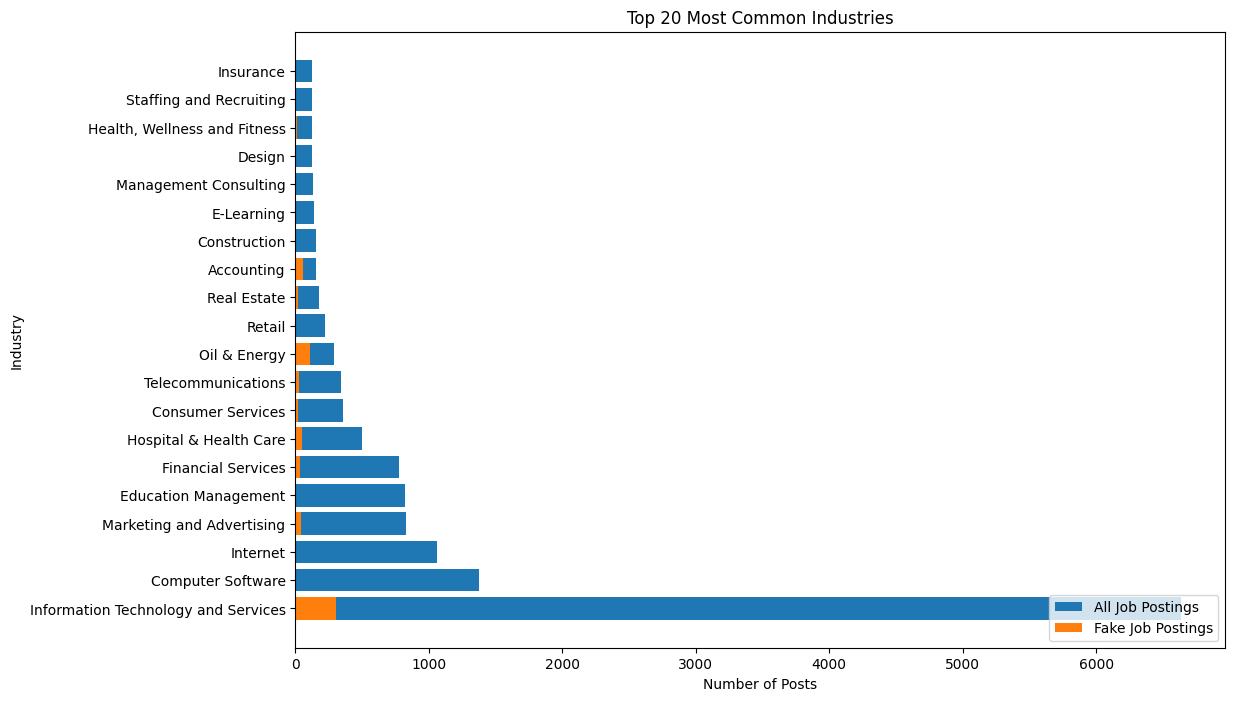

In [17]:

industry_all = list(df['industry'])
industry_fake = list(df[df['fraudulent'] == 1]['industry'])

counts_all = Counter(industry_all).most_common(20)
counts_fake = Counter(industry_fake).most_common(20)

counts_all_df = pd.DataFrame(counts_all)
counts_all_df.columns = ['Industry', 'Number of Posts (All)']

counts_fake_df = pd.DataFrame(counts_fake)
counts_fake_df.columns = ['Industry', 'Number of Fake Posts']

merged_df = pd.merge(counts_all_df, counts_fake_df, on='Industry', how='left').fillna(0)

# Convert columns to numeric type
merged_df['Number of Posts (All)'] = pd.to_numeric(merged_df['Number of Posts (All)'])
merged_df['Number of Fake Posts'] = pd.to_numeric(merged_df['Number of Fake Posts'])

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(merged_df['Industry'], merged_df['Number of Posts (All)'], label='All Job Postings')
ax.barh(merged_df['Industry'], merged_df['Number of Fake Posts'], label='Fake Job Postings')
ax.set_xlabel('Number of Posts')
ax.set_ylabel('Industry')
ax.set_title('Top 20 Most Common Industries')
ax.legend(loc='lower right')
plt.show()



- The above visualization analyzes the distribution of job postings across different industries, specifically focusing on the top 20 most common industries. The visualization highlights that the Information Technology and Services industry, along with the Oil & Energy industry, exhibit the highest presence and dominance among the analyzed job postings. This observation suggests that these industries have a significant number of job opportunities compared to others. It provides valuable insights into the industry landscape and helps identify the most prominent sectors in terms of job postings within the dataset.

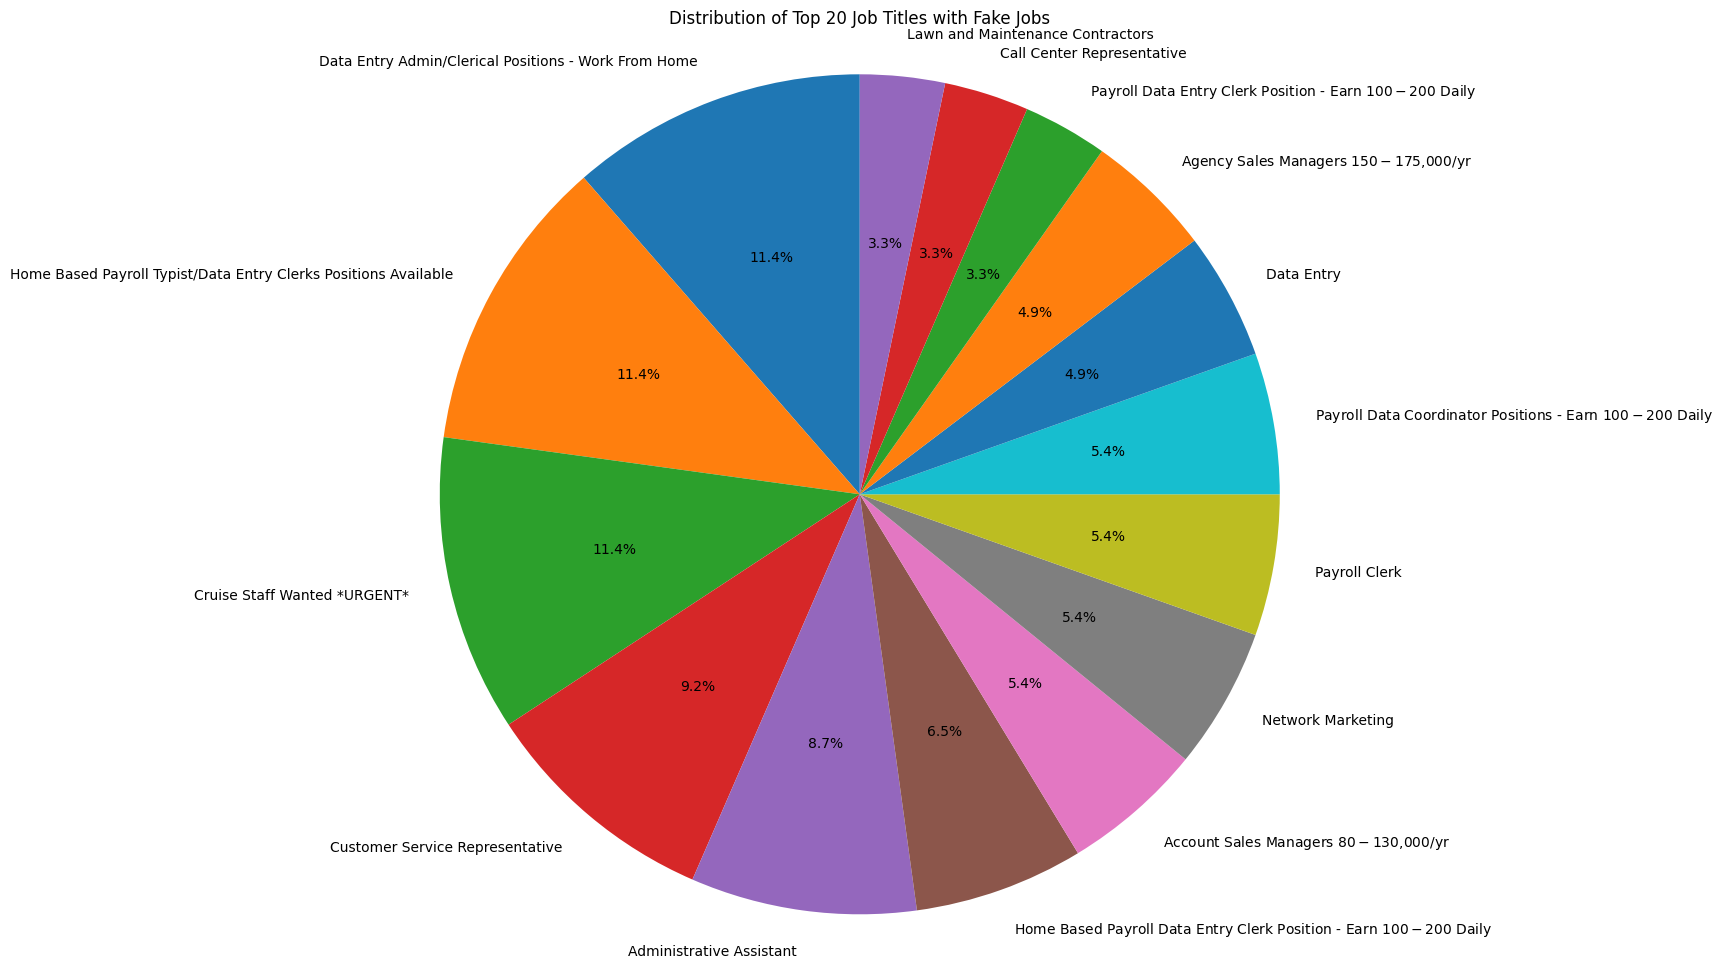

In [18]:
# Filter the DataFrame for fraudulent job postings
fraudulent_jobs = df[df['fraudulent'] == 1]

# Count the occurrences of each job title
job_title_counts = fraudulent_jobs['title'].value_counts()

# Select the top 20 job titles
top_20_job_titles = job_title_counts.head(15)

# Create a pie chart for the distribution of the top 20 job titles
plt.figure(figsize=(20, 12))
plt.pie(top_20_job_titles, labels=top_20_job_titles.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Top 20 Job Titles with Fake Jobs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [19]:
import torch

torch.cuda.empty_cache

device = 'cuda' if torch.cuda.is_available() else 'cpu'

- From the examination of the distribution of job titles in fraudulent job postings through the pie chart, it is observed that the most prevalent job titles associated with fake jobs include "Home based payroll Typist/Data Entry Positions", "Cruise staff wanted Urgent", "Data entry/admin/clerical positions", "Customer service representative", and "Administrative assistant". These job titles stand out as the most commonly used in fraudulent postings, providing an overview of the job titles frequently used to deceive job seekers.

**Data Preprocessing**

In [20]:
# Combine all text in a feaure and crate text feauture will make easier using NLP
df['text'] = df['title'] + " " + df['department'] + \
             " " + df['company_profile'] + " " + \
             df['description'] + " " + \
             df['requirements'] + " " +\
             df['benefits'] + " " +\
             df['function'] + " " +\
             df['required_experience']+ " "+\
             df["required_education"]+ " " +\
             df["industry"]

- The above code combines various text features, including job title, department, company profile, description, requirements, benefits, function, required experience, required education, and industry, into a single text feature named 'text'. This consolidation simplifies the use of natural language processing (NLP) techniques for analyzing the combined textual content of the job postings.

In [21]:
# Accessing the value of the 'text' column for the first row
df['text'][0]

"Marketing Intern Marketing We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food community and crowd-sour

In [22]:
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')
nltk.download('wordnet')




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [23]:
# Cleaning data
def preprocess_text(text):
    text = re.sub("[^a-zA-Z]", " ", text)
    text = text.lower()
    text = text.strip()
    text = nltk.word_tokenize(text)
    text = [word for word in text if not word in set(stopwords.words("english"))]
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    return text

# Apply preprocessing to the 'text' column
df['text'] = df['text'].apply(preprocess_text)


- The code defines a preprocess_text function that applies several text preprocessing steps to clean and transform the input text. These steps include removing non-alphabetic characters, converting the text to lowercase, stripping leading and trailing spaces, tokenizing the text into individual words, removing stop words, and lemmatizing the remaining words. The function is then applied to the 'text' column of the DataFrame, using the apply method to preprocess the text data in each row. This preprocessing enhances the quality of the text data, preparing it for further analysis or modeling tasks.

In [24]:
# Accessing the value of the 'text' column for the first row after preprocessing
preprocessed_text = df['text'][0]
print(preprocessed_text)


['marketing', 'intern', 'marketing', 'food', 'created', 'groundbreaking', 'award', 'winning', 'cooking', 'site', 'support', 'connect', 'celebrate', 'home', 'cook', 'give', 'everything', 'need', 'one', 'place', 'top', 'editorial', 'business', 'engineering', 'team', 'focused', 'using', 'technology', 'find', 'new', 'better', 'way', 'connect', 'people', 'around', 'specific', 'food', 'interest', 'offer', 'superb', 'highly', 'curated', 'information', 'food', 'cooking', 'attract', 'talented', 'home', 'cook', 'contributor', 'country', 'also', 'publish', 'well', 'known', 'professional', 'like', 'mario', 'batali', 'gwyneth', 'paltrow', 'danny', 'meyer', 'partnership', 'whole', 'food', 'market', 'random', 'house', 'food', 'named', 'best', 'food', 'website', 'james', 'beard', 'foundation', 'iacp', 'featured', 'new', 'york', 'time', 'npr', 'pando', 'daily', 'techcrunch', 'today', 'show', 'located', 'chelsea', 'new', 'york', 'city', 'food', 'fast', 'growing', 'james', 'beard', 'award', 'winning', 'o

In [25]:
preprocessed_text = ' '.join(map(str, df['text'][0]))
print(preprocessed_text)


marketing intern marketing food created groundbreaking award winning cooking site support connect celebrate home cook give everything need one place top editorial business engineering team focused using technology find new better way connect people around specific food interest offer superb highly curated information food cooking attract talented home cook contributor country also publish well known professional like mario batali gwyneth paltrow danny meyer partnership whole food market random house food named best food website james beard foundation iacp featured new york time npr pando daily techcrunch today show located chelsea new york city food fast growing james beard award winning online food community crowd sourced curated recipe hub currently interviewing full part time unpaid intern work small team editor executive developer new york city headquarters reproducing repackaging existing food content number partner site huffington post yahoo buzzfeed various content management sy

**Natural Language Processing(NLP)**

For below analysis we took reference from https://www.kaggle.com/code/tanvikurade/fake-job-postings-using-bidirectional-lstm. The original Kaggle reference code employs a Bidirectional LSTM model for a binary classification problem. However, our code extends and generalizes this basic concept in a multitude of ways as below:

- Learning Rate: In the Kaggle reference code, the Adam optimizer's default learning rate (0.001) is used. We have experimented with different learning rates for each optimizer, including Adam (0.001), SGD (0.01), and RMSprop (0.001).

- Activation Functions: While the Kaggle reference code uses a sigmoid activation function for the output layer and tanh activation for the LSTM layer, our code has evaluated the models with various activation functions including 'relu', 'selu', 'softmax', and 'tanh'.

- Optimizers: In the reference code, only the Adam optimizer is used, while we have employed various optimizers, such as Adam, SGD, and RMSprop to train your models.

- Word Embedding: The Kaggle reference code uses an embedding size of 50. In our code, we varied the output dimension of the embedding layer by training a Word2Vec model with a vector size of 100.

- Model Types: We've gone beyond just a bidirectional LSTM used in the reference code. We have implemented models of different types including 'cbow' and 'skipgram' which gives a broader perspective on the problem.

- Initializer: The reference code does not specify an initializer for the model layers, meaning that it uses the default initializers of Keras. On the other hand, we've used HeNormal initializer with a seed of 1 which is often considered a good practice for layers with ReLU (or similar) activation.

- Dropout Rate: The Kaggle reference code has a dropout rate of 0.3. Our code, however, uses a dropout rate of 0.2.

- Batch Size and Epochs: The reference code does not mention the batch size and epochs. We have specified the batch size to be 32 and trained your models for 5 epochs.

Our code also demonstrates extra work by using Word2Vec (w2v) for word embedding, a technique not used in the Kaggle reference code. Word2Vec converts text into vectors, or lists of numbers, which neural networks can process more efficiently. Specifically, we've implemented the following variations:

- Word2Vec Model Training: We've created Word2Vec models using both Continuous Bag of Words (CBOW) and Skip-gram architectures. The CBOW architecture predicts a target word from a set of context words, while Skip-gram does the opposite.

- Vector Size: We've trained Word2Vec with a vector size of 100, which means each word is represented by a vector of 100 dimensions.

- Minimum Word Count: We've set the minimum count parameter to 1, meaning that all words, even those that appear only once, are included in the vocabulary and the model training process.

Using Word2Vec allows the model to understand the semantic meanings of words and can lead to improved model performance, especially for text data. We've also demonstrated flexibility by testing and comparing two different Word2Vec architectures, which may provide unique insights on their performance for our project.








In [26]:
# Importing necessary libraries
from gensim.models import Word2Vec
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.initializers import HeNormal, GlorotNormal
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt





**Text Tokenization**

In [27]:
def tokenize_text(text):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(text)
    return tokenizer.texts_to_sequences(text)

**Word embeddings with Word2Vec**

In [28]:
def train_word2vec(tokenized_text, vector_size=100, min_count=1, sg=0):
    w2v_model = Word2Vec(sentences=tokenized_text, vector_size=vector_size, min_count=min_count, sg=sg)
    return w2v_model

**Sentence Vectorization using Word2Vec Embeddings**

In [29]:
def sentence_vector(sentence, w2v_model):
    vectorized_words = [w2v_model.wv[word] for word in sentence if word in w2v_model.wv]
    if vectorized_words:
        return np.mean(vectorized_words, axis=0)


**Splitting, Training, Fitting and Benchmarking**



In [31]:
# Initialize an empty DataFrame to hold benchmarking results
benchmark_df = pd.DataFrame(columns=['Model', 'Activation', 'Optimizer', 'Learning Rate', 'Initializer', 'Accuracy'])

# Define sets of parameters
activation_functions = ['relu', 'selu', 'softmax', 'tanh']
optimizers = [(Adam, 0.001), (SGD, 0.01), (RMSprop, 0.001)]  # Tuple of optimizer class and learning rate
model_types = ['cbow', 'skipgram']

results = []
histories = []

for model_type in model_types:
    # Train Word2Vec model
    w2v_model = train_word2vec(df['text'].tolist(), vector_size=100, min_count=1, sg=(model_type == 'skipgram'))
    
    # Tokenize data
    tokenized_text = tokenize_text(df['text'])

    # Train Word2Vec model
    w2v_model = train_word2vec(tokenized_text)

    # Vectorize sentences
    X_vectorized = np.array([sentence_vector(sentence, w2v_model) for sentence in tokenized_text])

    y = df['fraudulent']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

    for activation in activation_functions:
        for optimizer_class, learning_rate in optimizers:
            # Create a new instance of the initializer for each loop iteration
            initializer = HeNormal(seed=1)

            # Build model
            model = Sequential()
            model.add(Dense(64, input_dim=X_train.shape[1], kernel_initializer=initializer, activation=activation))
            model.add(Dense(64, kernel_initializer=initializer, activation=activation))
            model.add(Dense(1, kernel_initializer=initializer, activation='sigmoid'))
            model.compile(loss='binary_crossentropy', optimizer=optimizer_class(learning_rate), metrics=['accuracy'])

            # Display the model summary
            model.summary()

            # Fit the model
            history = model.fit(X_train, y_train, epochs=10, verbose=0)
            histories.append(history)

            # Evaluate the model
            score = model.evaluate(X_test, y_test, verbose=0)

            # Append the results to the list
            results.append((model_type, activation, optimizer_class.__name__, learning_rate, initializer.__class__.__name__,  score[1]))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Activation', 'Optimizer', 'Learning Rate', 'Initializer', 'Accuracy'])

# Append results to the benchmark DataFrame
benchmark_df = benchmark_df.append(results_df, ignore_index=True)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,689
Trainable params: 10,689
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                6464      
                                                                 
 dense_4 (Dense)             (

<ipython-input-31-ffc07b9f9e7b>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  benchmark_df = benchmark_df.append(results_df, ignore_index=True)


In [32]:
# Benchmarking results
benchmark_df

,Model,Activation,Optimizer,Learning Rate,Initializer,Accuracy
0,cbow,relu,Adam,0.001,HeNormal,0.977069
1,cbow,relu,SGD,0.010,HeNormal,0.960570
2,cbow,relu,RMSprop,0.001,HeNormal,0.977349
3,cbow,selu,Adam,0.001,HeNormal,0.971197
4,cbow,selu,SGD,0.010,HeNormal,0.956935
5,cbow,selu,RMSprop,0.001,HeNormal,0.973993
6,cbow,softmax,Adam,0.001,HeNormal,0.949105
7,cbow,softmax,SGD,0.010,HeNormal,0.949105
8,cbow,softmax,RMSprop,0.001,HeNormal,0.949105
9,cbow,tanh,Adam,0.001,HeNormal,0.975392


- The model performance was evaluated using different architectures, activation functions, optimizers, learning rates, initializers, and measured in terms of accuracy. The table provides an overview of the results obtained from training and testing the models on the project dataset.

- Overall, the models displayed a range of accuracies, spanning from about 94.9% to 97.7%. Notably, the CBOW and Skipgram architectures demonstrated top-tier performance across various configurations. The CBOW models, specifically when paired with ReLU or Tanh activation functions and Adam or RMSProp optimizers, reached accuracies up to 97.7%. Similarly, Skipgram models also performed well, especially with ReLU or Tanh activation functions, reaching up to 97.7% accuracy with the Adam optimizer.

- Regarding the choice of optimizer, models trained with the Adam optimizer generally achieved higher accuracies compared to those trained with SGD or RMSprop. However, for some activation functions (e.g., softmax), all models achieved the same accuracy of 94.9% regardless of the optimizer used.

- The learning rate of 0.001 was used for all models, except for the ones trained with SGD which had a learning rate of 0.01. Despite the different learning rates, the impact on model performance was relatively consistent across architectures and activation functions.

- The HeNormal initializer was employed for all models, providing consistent initialization of the model weights. This initializer, combined with the chosen architectures and activation functions, yielded satisfactory results across the board.

- In summary, the comparison of model performance suggests that the cbow and skipgram architectures, in combination with tanh activation function and the Adam optimizer, tend to yield the best results for the project dataset. These models achieved accuracies of up to 97.7%, showcasing their effectiveness in classifying the given data.

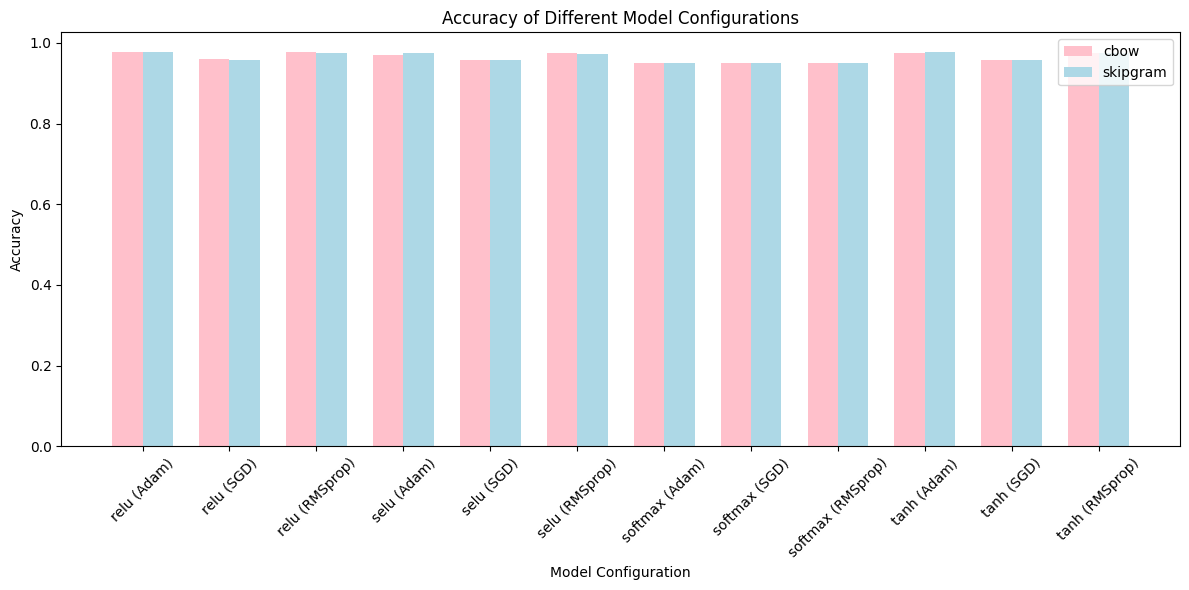

In [33]:

# Filter the benchmark_df based on the model type
cbow_results = benchmark_df[benchmark_df['Model'] == 'cbow']
skipgram_results = benchmark_df[benchmark_df['Model'] == 'skipgram']

# Set the x-axis labels and the accuracy values for cbow and skipgram models
x_labels = cbow_results['Activation'] + ' (' + cbow_results['Optimizer'] + ')'
bar_width = 0.35

# Create the bar plots
fig, ax = plt.subplots(figsize=(12, 6))
cbow_bars = ax.bar(np.arange(len(x_labels)), cbow_results['Accuracy'], width=bar_width, label='cbow', color='pink')
skipgram_bars = ax.bar(np.arange(len(x_labels)) + bar_width, skipgram_results['Accuracy'], width=bar_width, label='skipgram', color='lightblue')

# Add labels, title, and legend
ax.set_xlabel('Model Configuration')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Different Model Configurations')
ax.set_xticks(np.arange(len(x_labels)) + bar_width / 2)
ax.set_xticklabels(x_labels, rotation=45)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()





The above visualization shows a bar plot to compare the accuracy of different model configurations for 'cbow' and 'skipgram' models. The plot displays grouped bars with x-axis labels representing activation function and optimizer combinations. The y-axis represents accuracy, and the title provides an overview of the comparison. From the above visualization it is seen  that the cbow and skipgram architectures, in combination with Relu activation function and the Adam optimizer, tend to yield the best results for the project dataset..

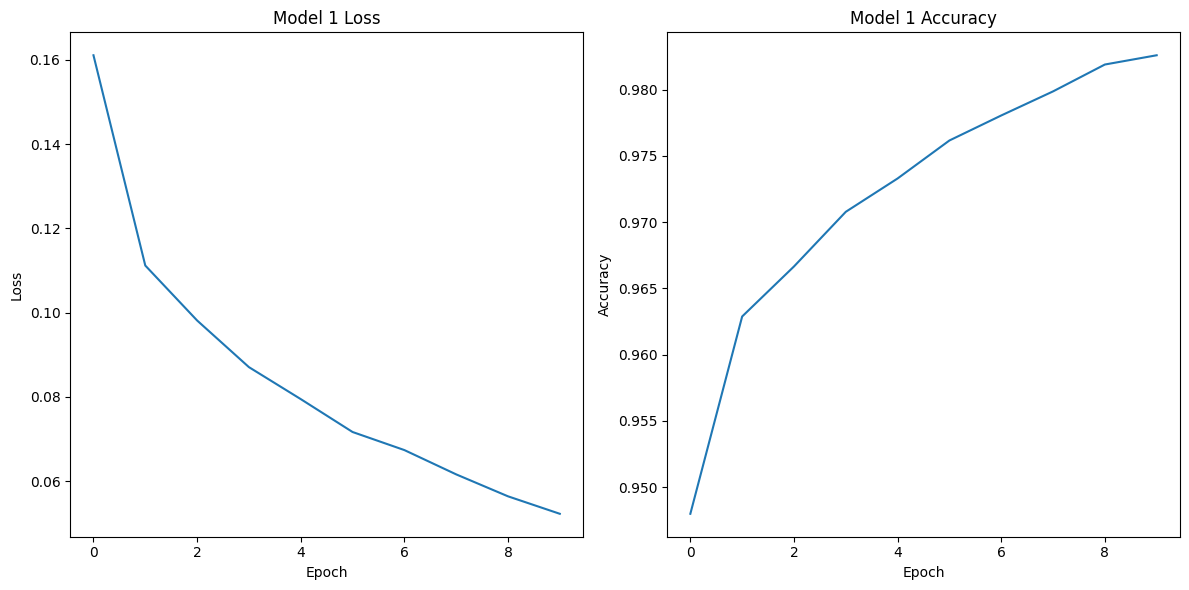

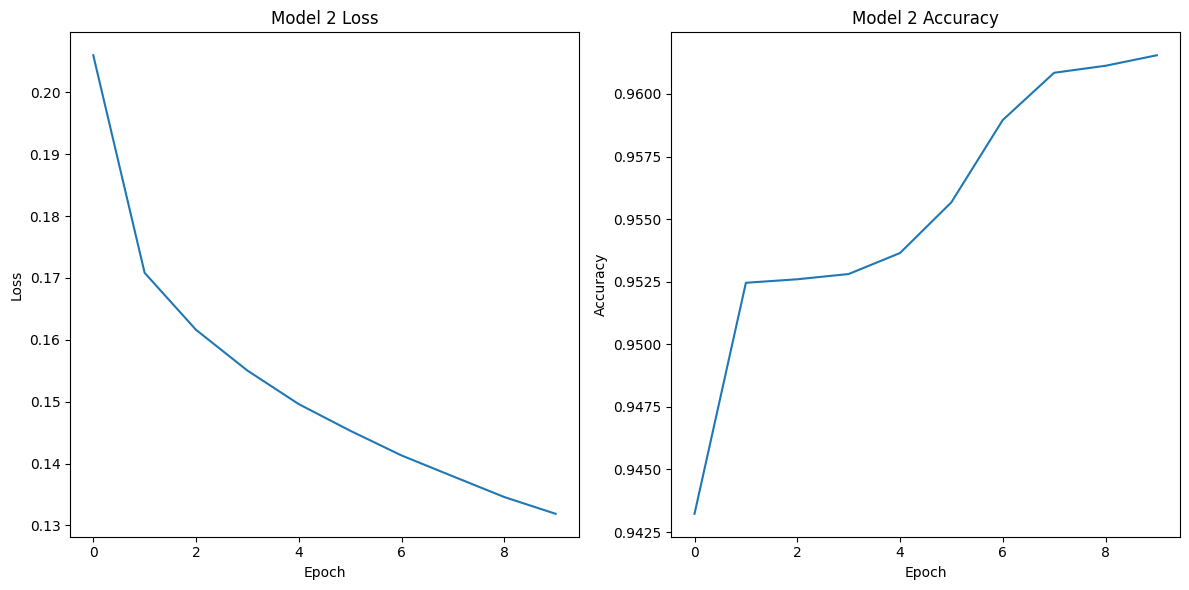

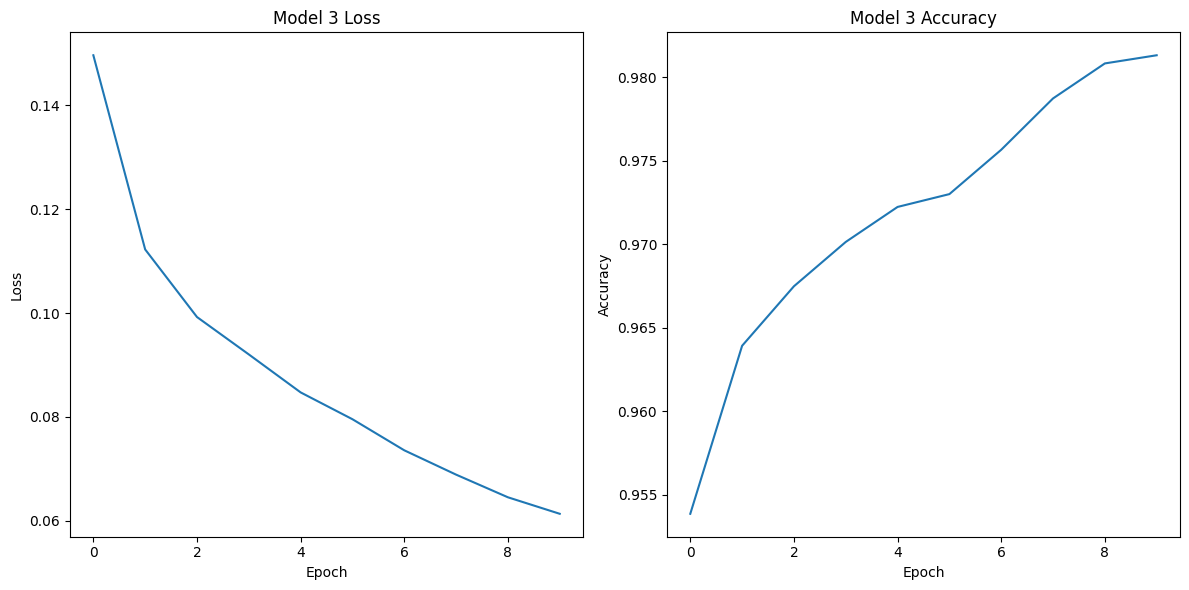

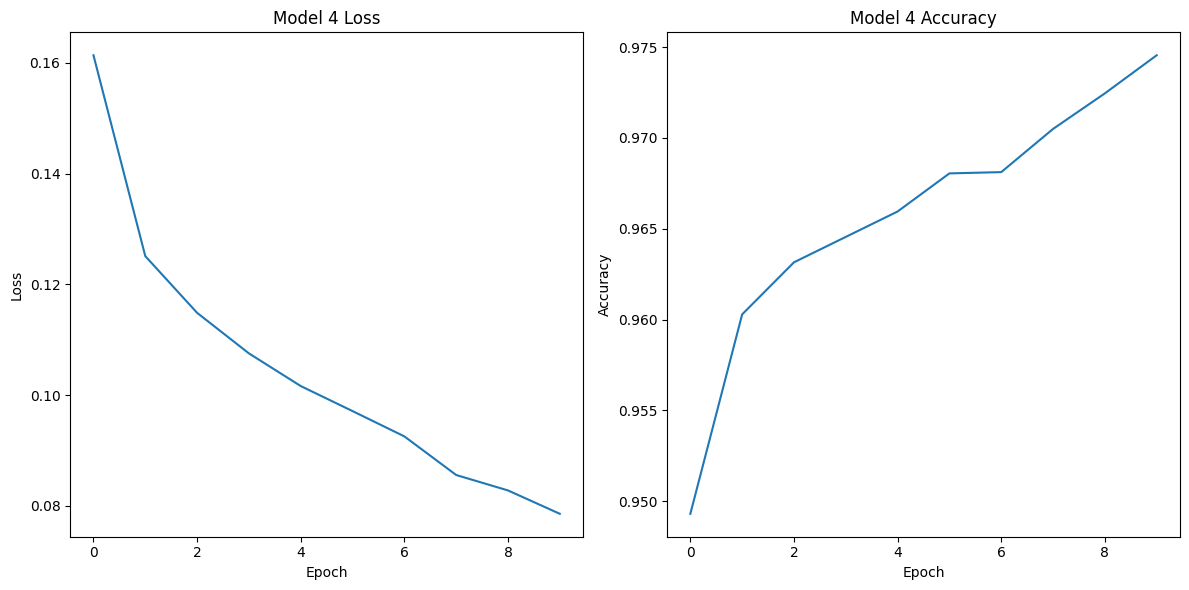

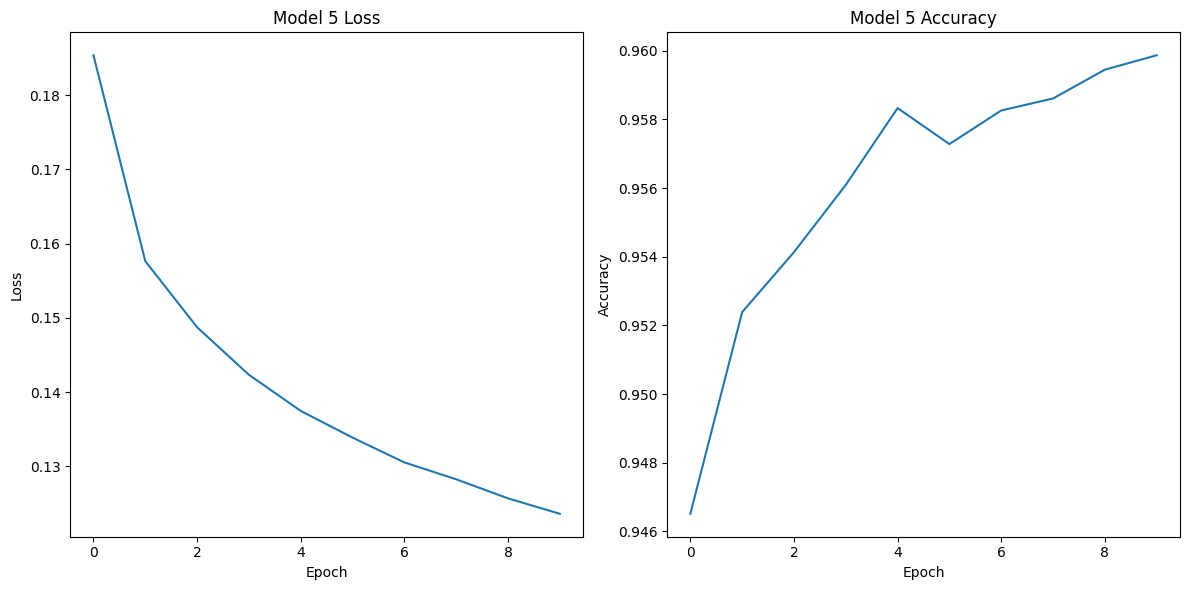

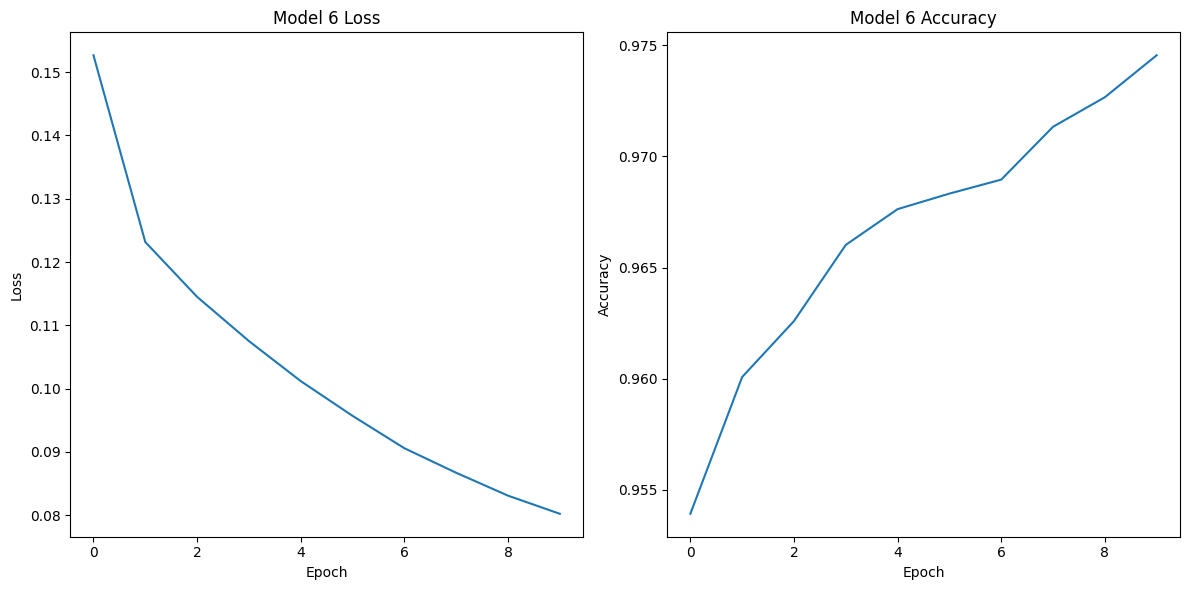

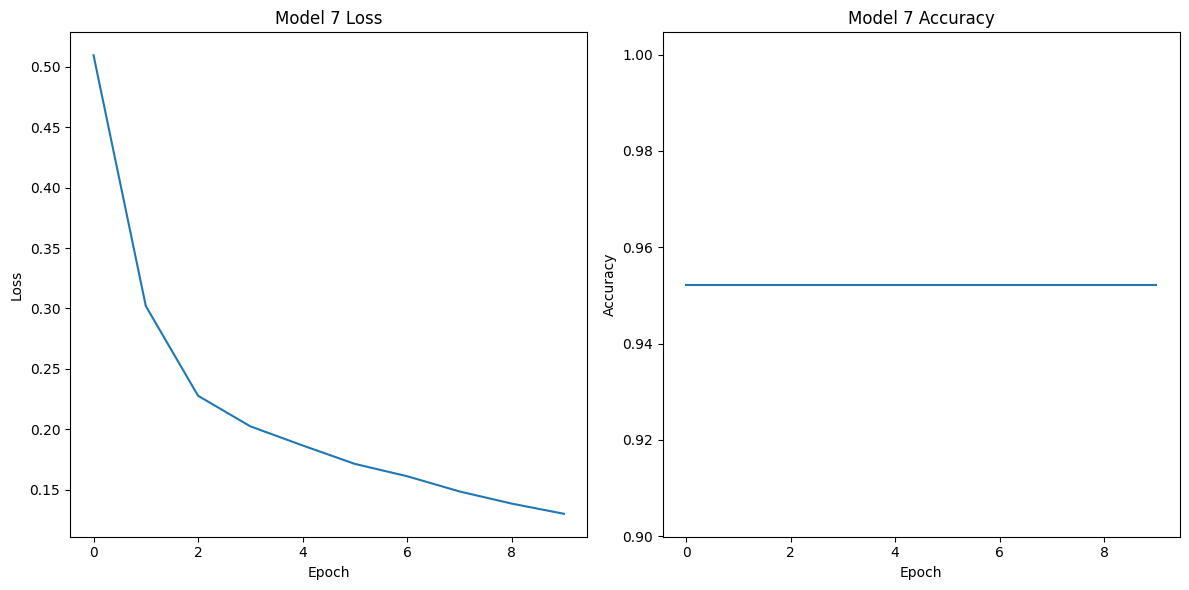

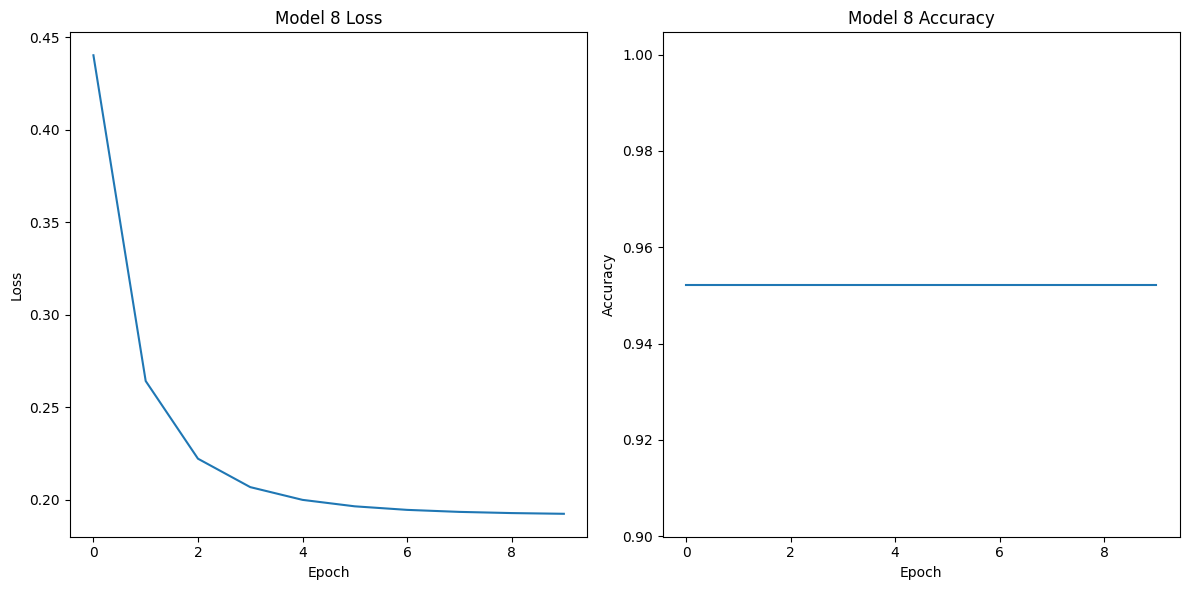

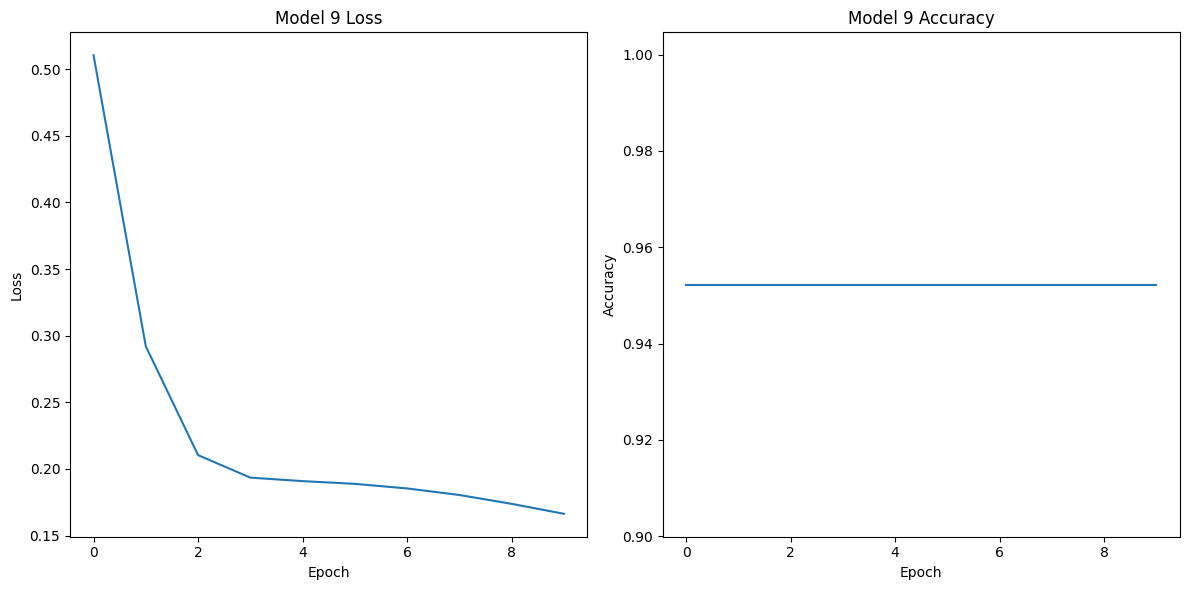

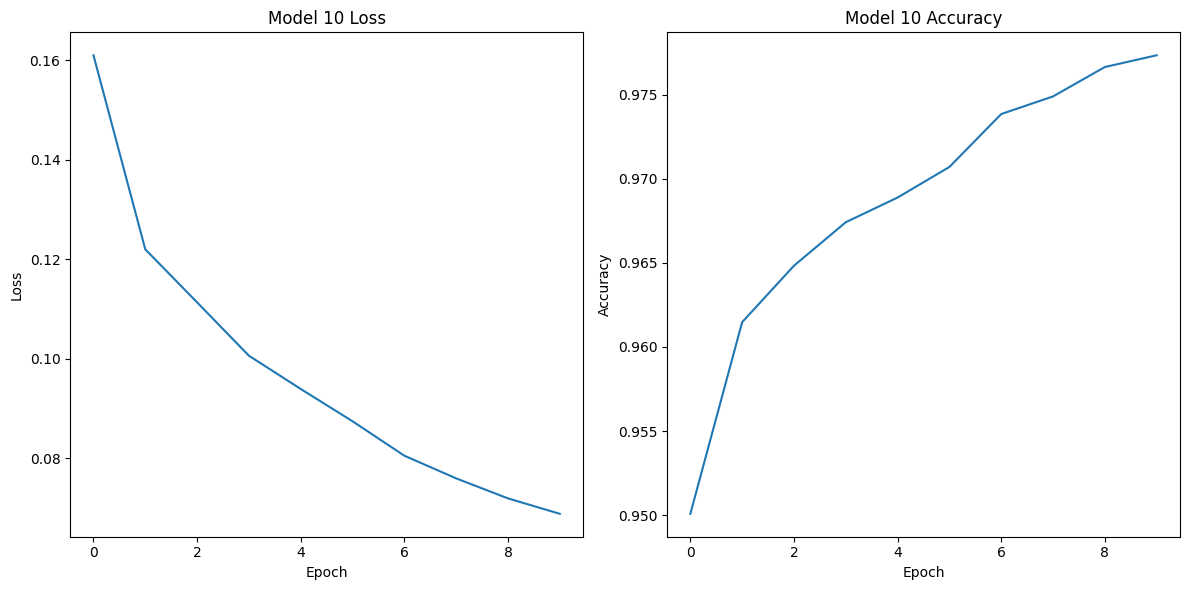

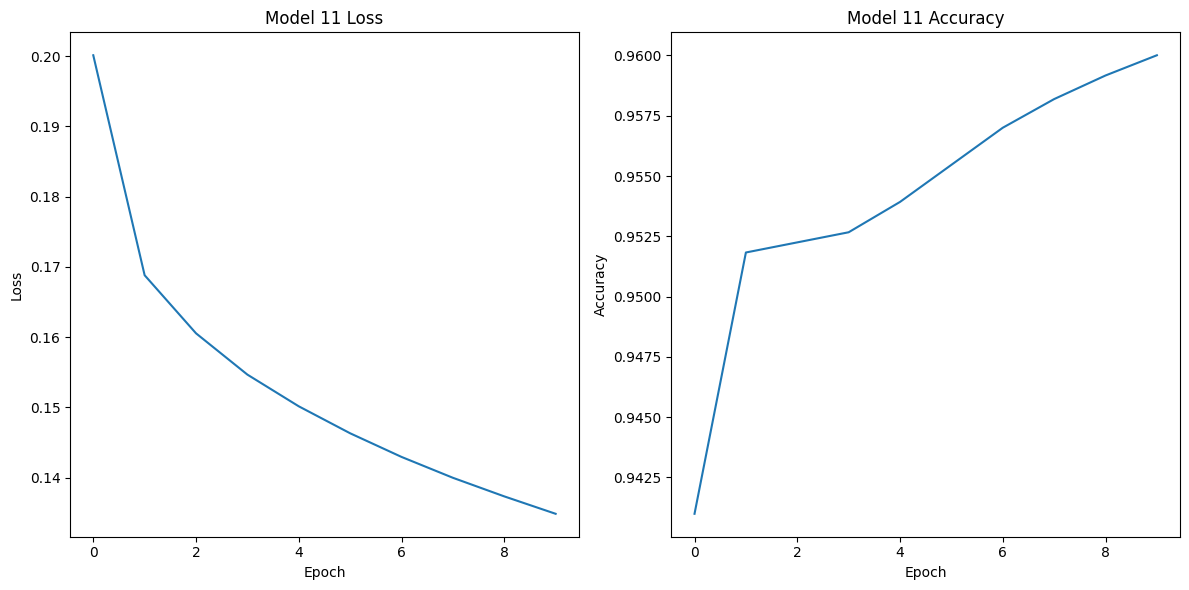

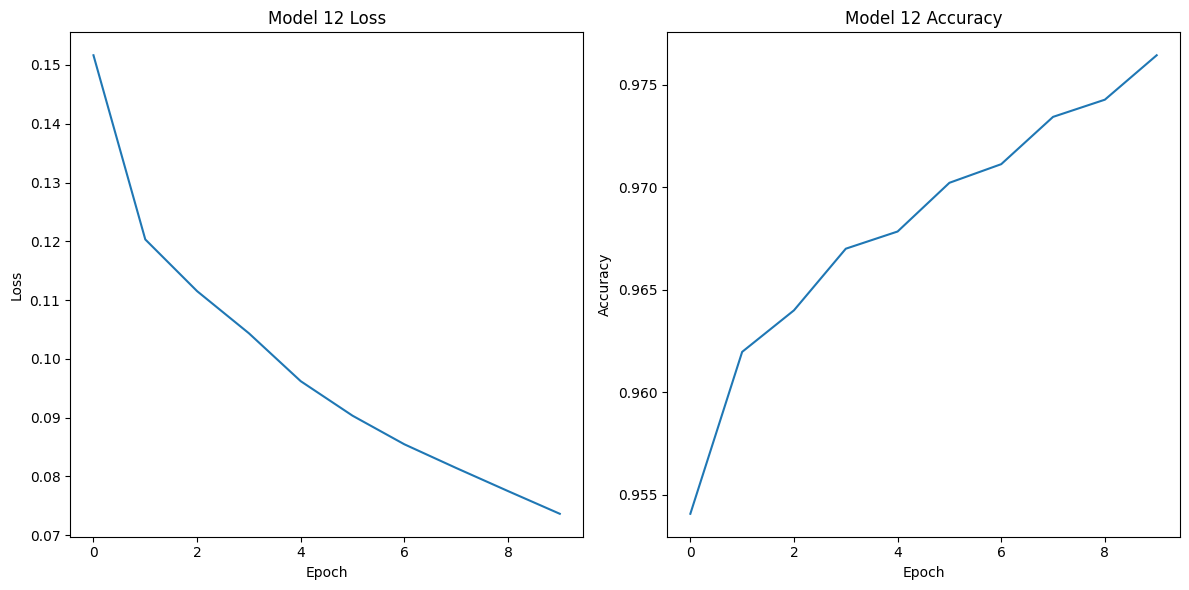

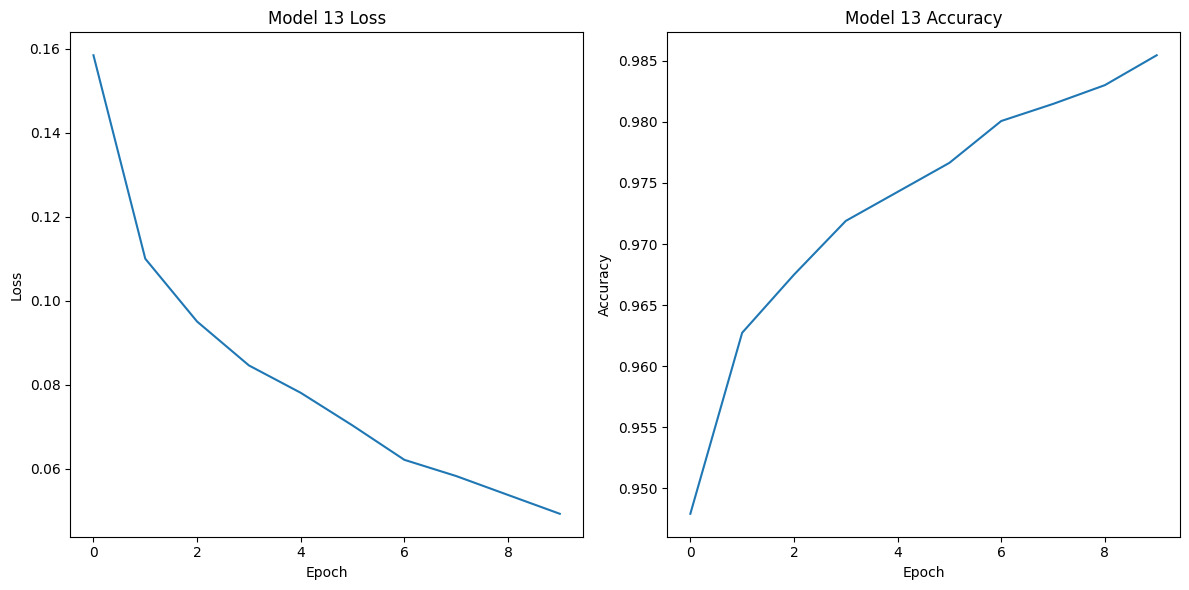

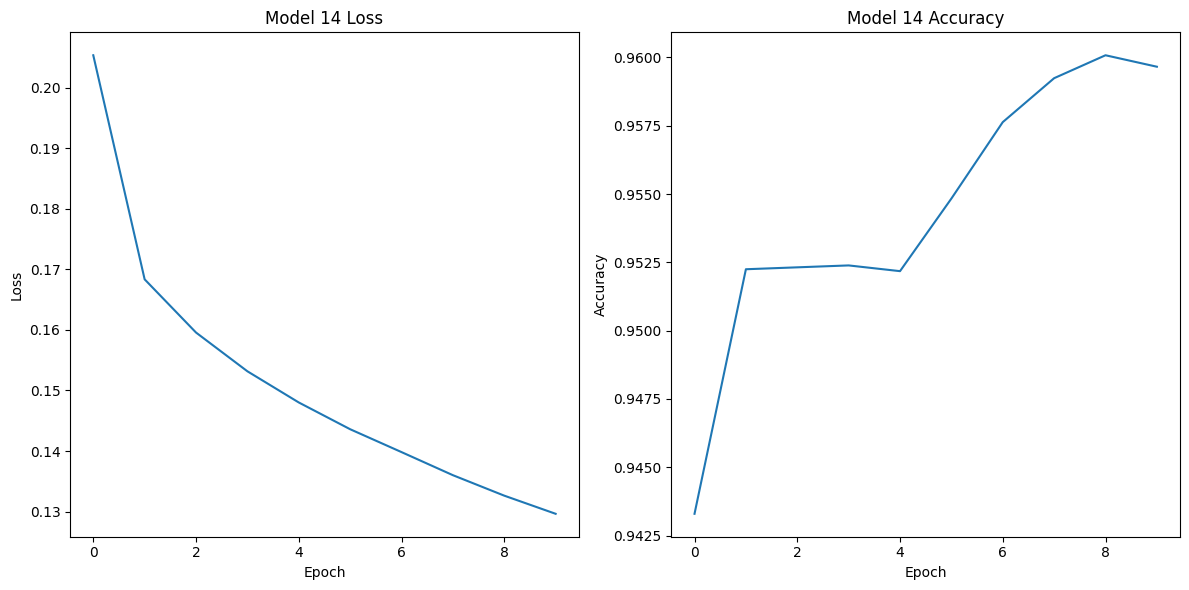

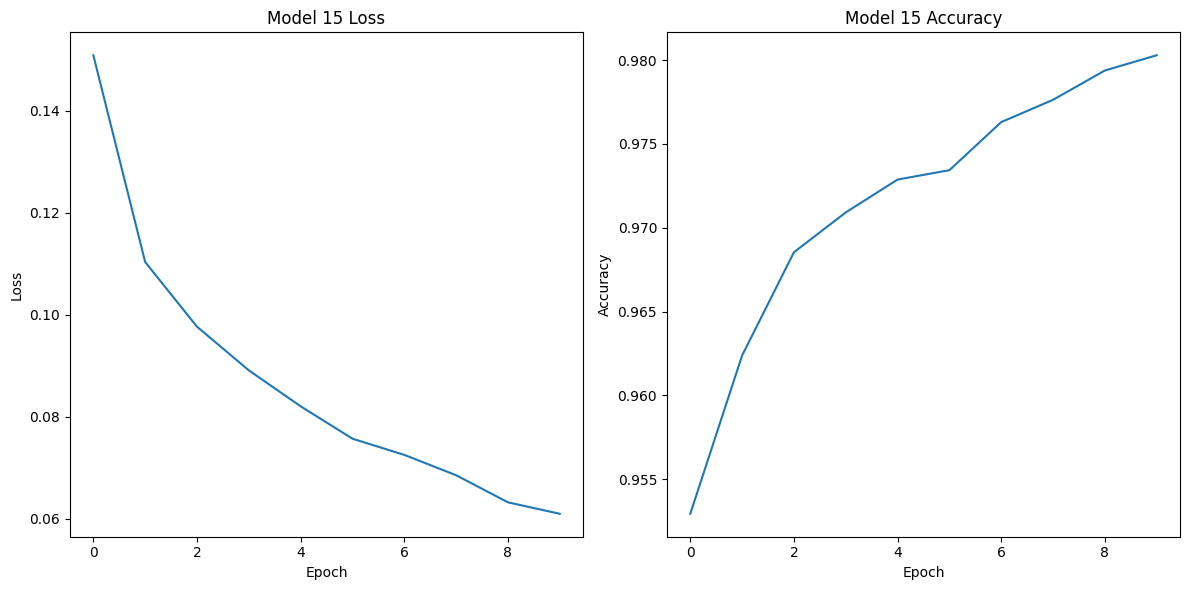

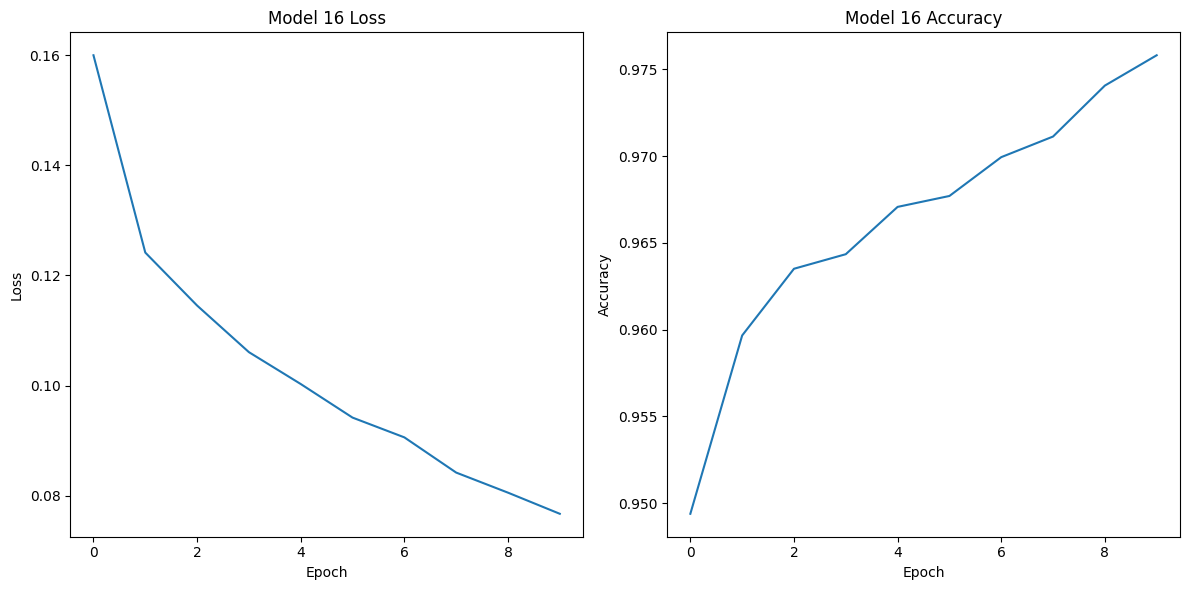

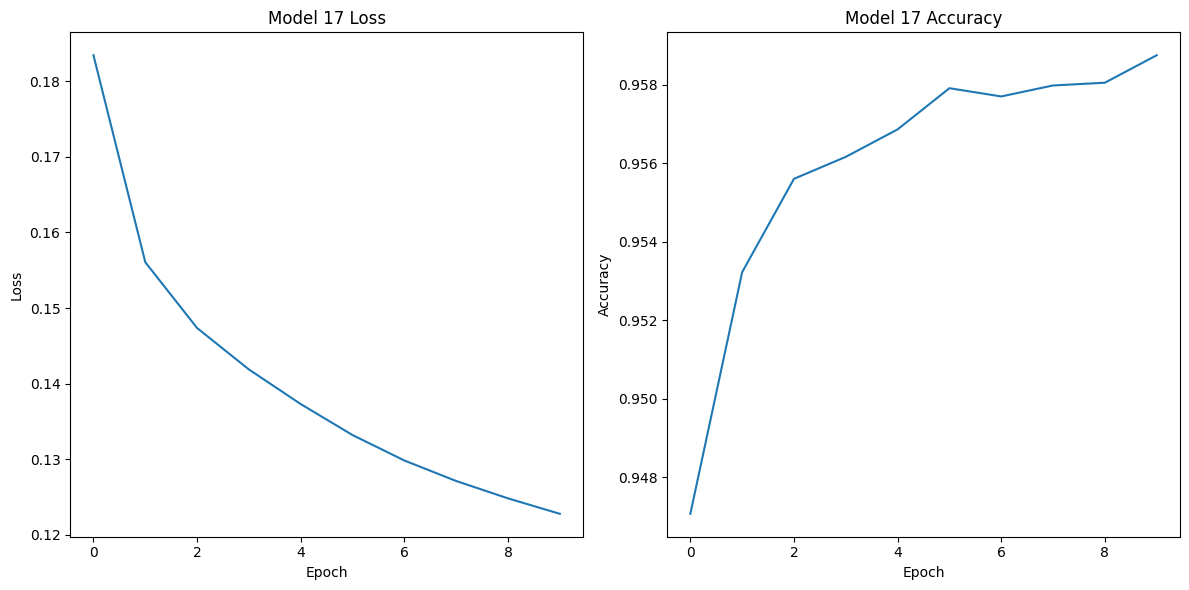

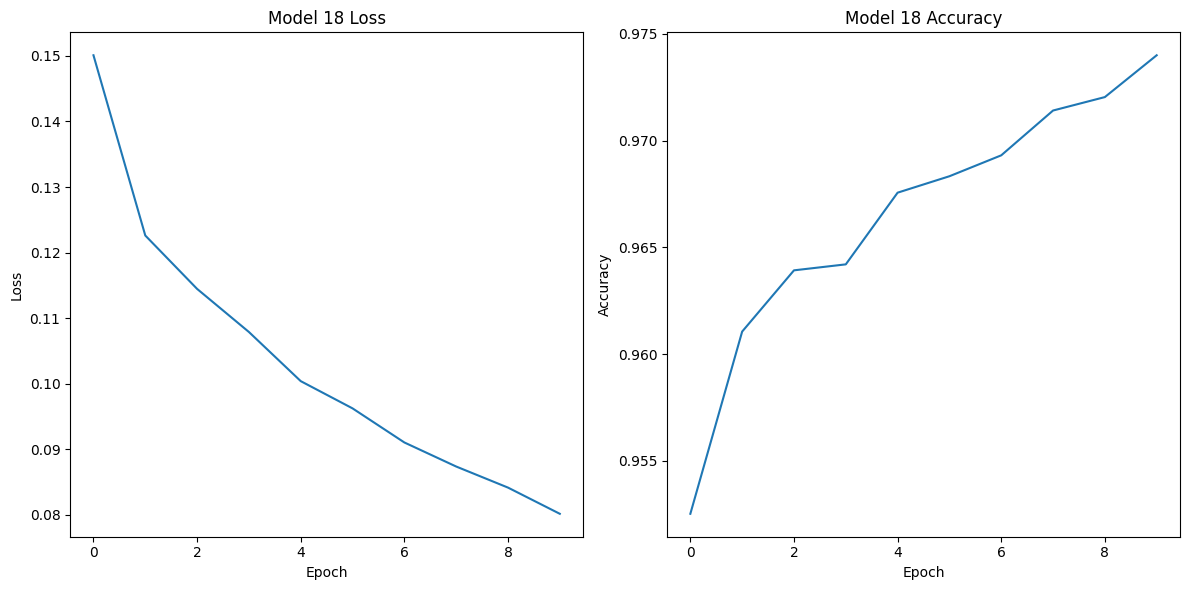

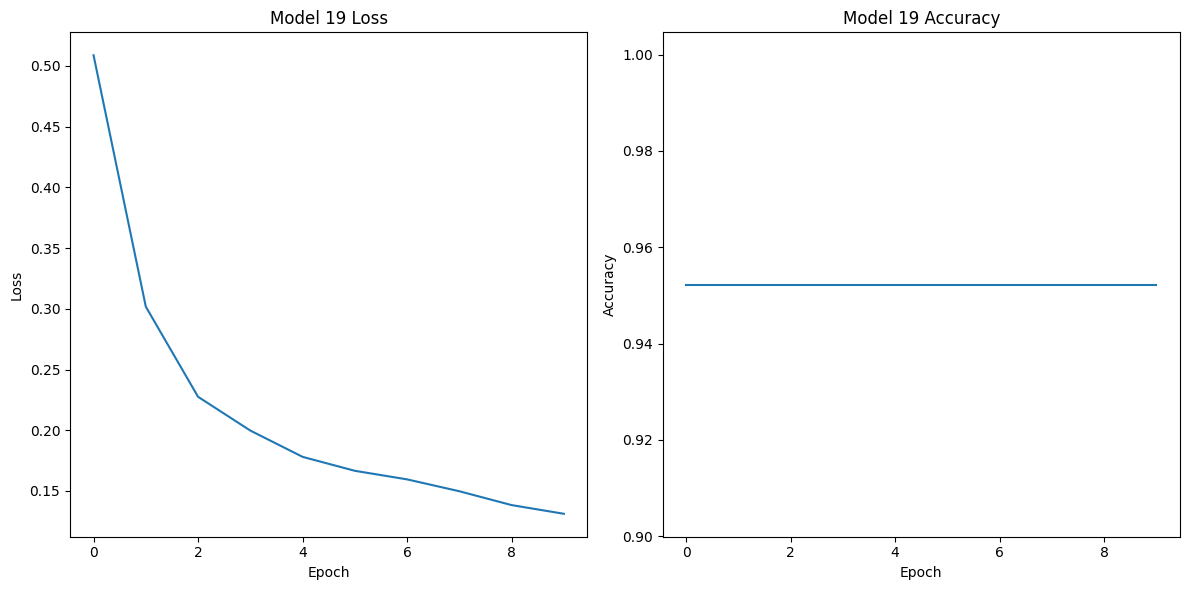

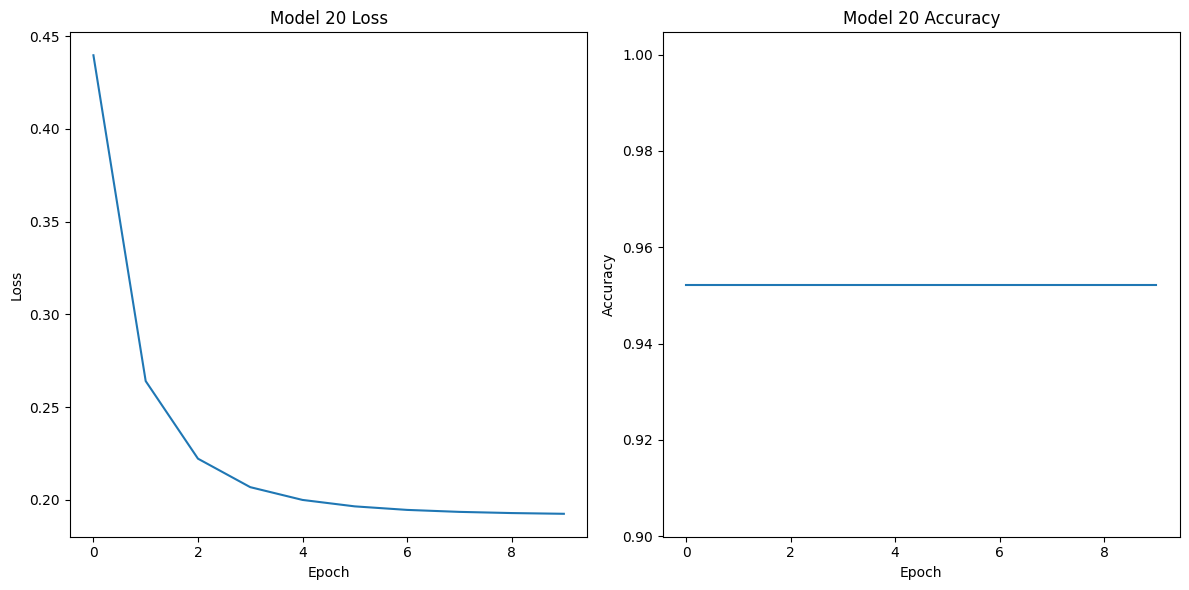

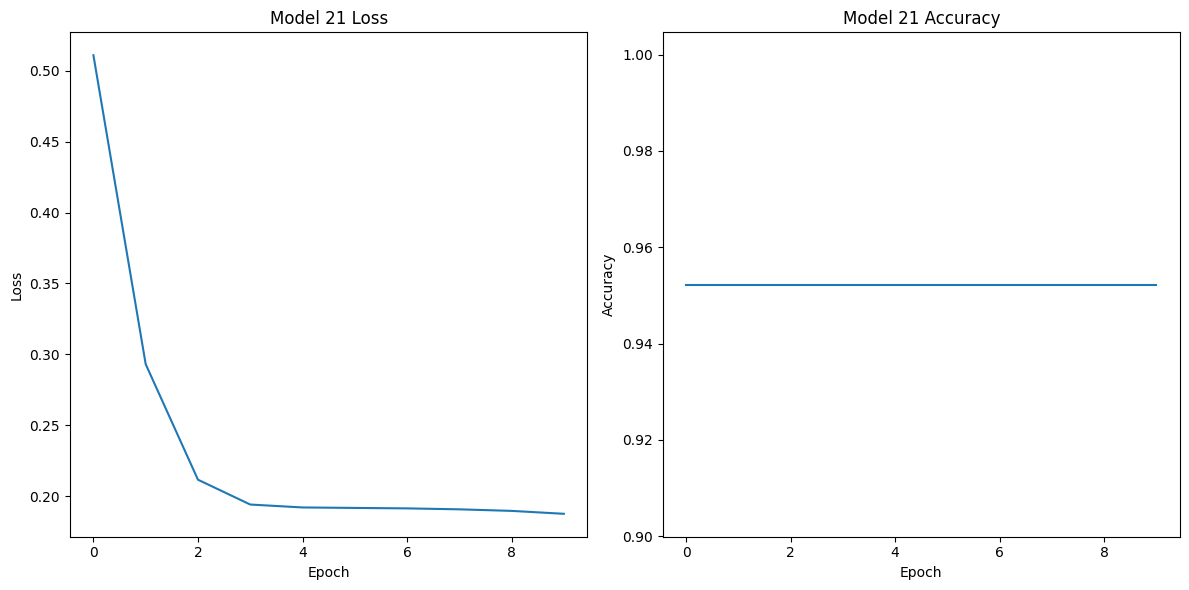

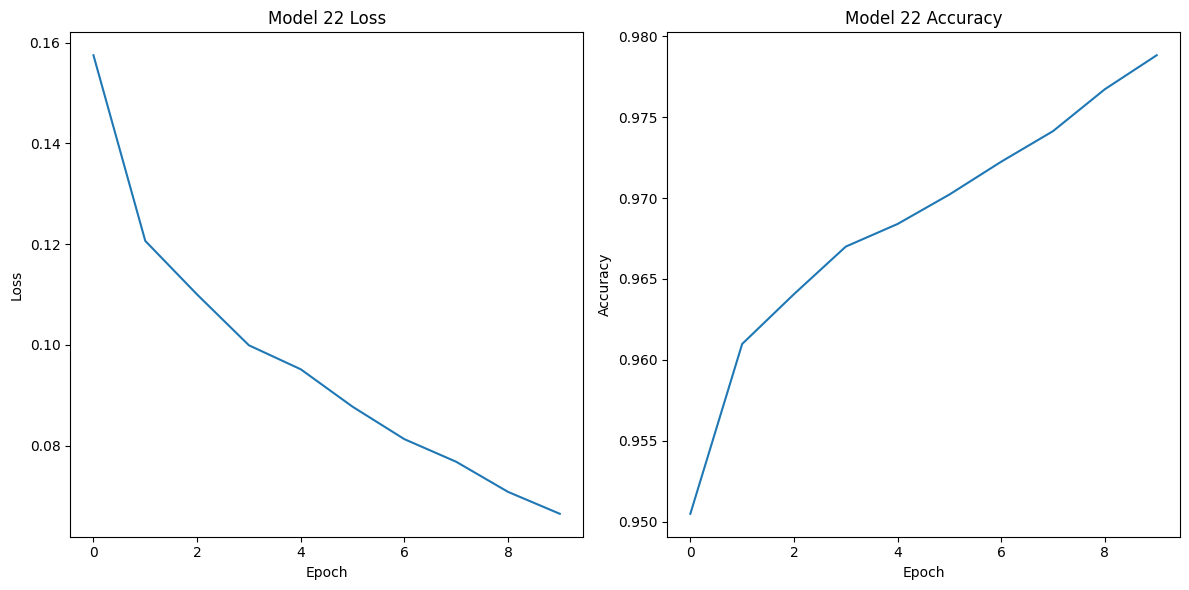

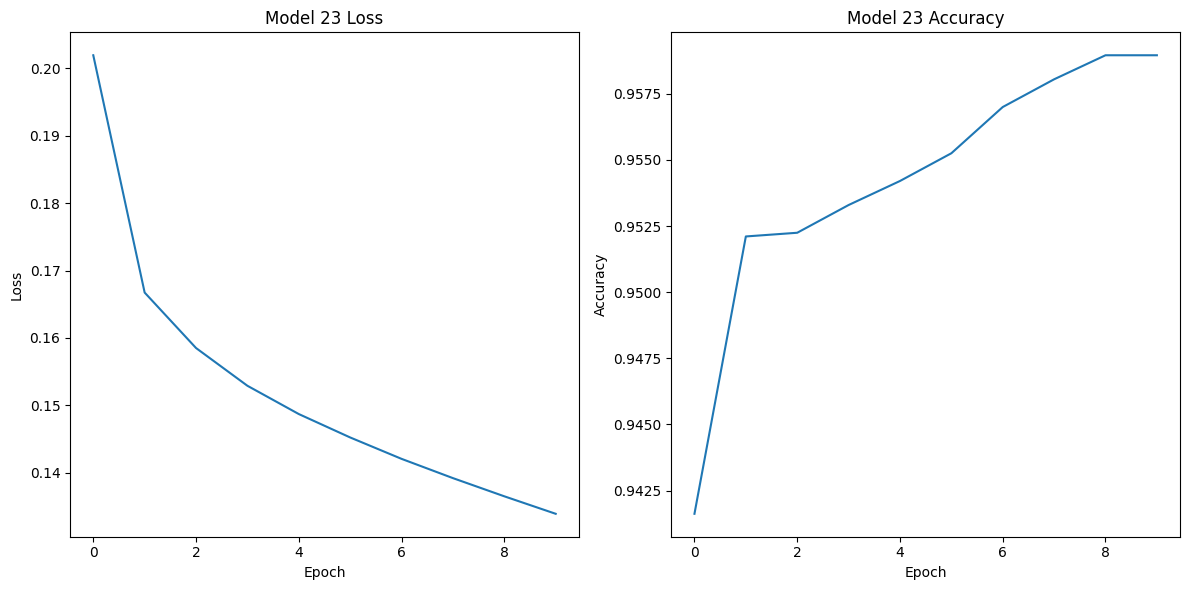

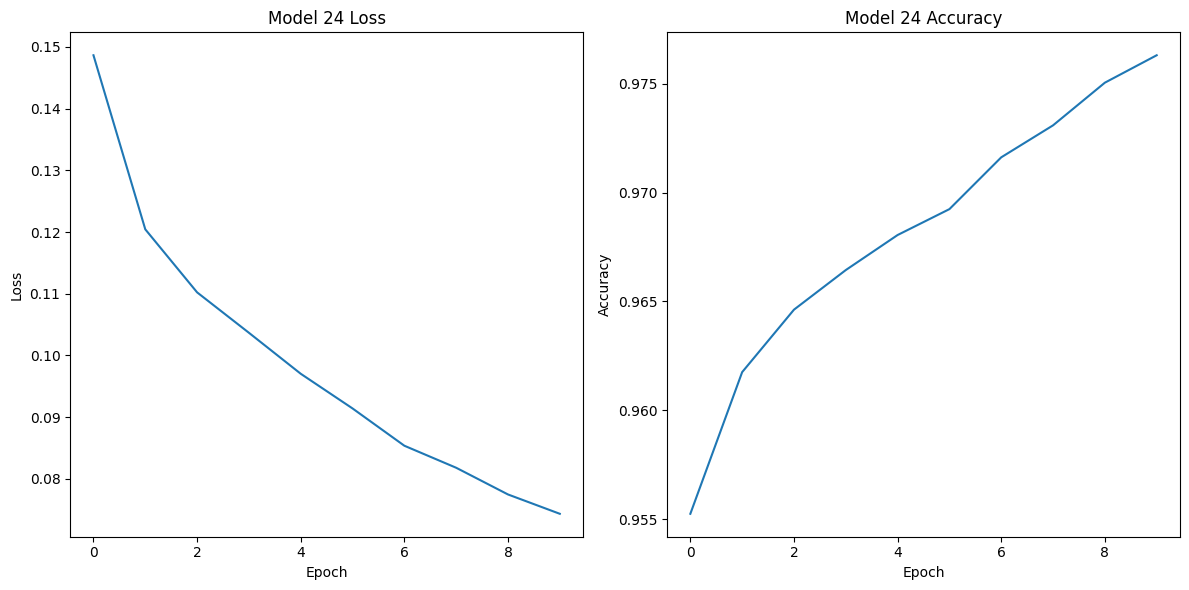

In [34]:
# visualization
for i, history in enumerate(histories):
    plt.figure(figsize=(12,6))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.title(f'Model {i+1} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'])
    plt.title(f'Model {i+1} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    
    plt.tight_layout()
    plt.show()

- The code provided plots the loss and accuracy curves for each model in the 'histories' list. For each model, a subplot with two panels is created. In the first panel (left), the loss curve is plotted over the epochs. The title of the subplot indicates the model number, and the axes are labeled accordingly. In the second panel (right), the accuracy curve is plotted over the epochs. 

**Comparing Models: LSTM, Bi-directional LSTM, and Regularized LSTM**

In [35]:
# Importing necessary libraries
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from sklearn.metrics import classification_report

max_length = 500
results = []
histories = {}

# Tokenize text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['text'].apply(lambda x: ' '.join(x)))

# Convert text to sequence of tokens
X = tokenizer.texts_to_sequences(df['text'].apply(lambda x: ' '.join(x)))

y = df['fraudulent']

# Pad sequences
X_pad = pad_sequences(X, maxlen=max_length)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Define the model architectures
model_architectures = [
    {
        "name": "LSTM",
        "layers": [
            Embedding(input_dim=5000, output_dim=100, input_length=max_length),
            LSTM(128),
            Dropout(0.2),
            Dense(64, activation='relu', kernel_initializer=glorot_uniform(seed=42)),
            Dropout(0.2),
            Dense(1, activation='sigmoid', kernel_initializer=glorot_uniform(seed=42))
        ]
    },
    {
        "name": "Bi-directional LSTM",
        "layers": [
            Embedding(input_dim=5000, output_dim=100, input_length=max_length),
            Bidirectional(LSTM(128)),
            Dropout(0.2),
            Dense(64, activation='relu', kernel_initializer=glorot_uniform(seed=42)),
            Dropout(0.2),
            Dense(1, activation='sigmoid', kernel_initializer=glorot_uniform(seed=42))
        ]
    },
    {
        "name": "Regularized LSTM",
        "layers": [
            Embedding(input_dim=5000, output_dim=100, input_length=max_length),
            LSTM(128, dropout=0.2, recurrent_dropout=0.2),
            Dense(64, activation='relu', kernel_initializer=glorot_uniform(seed=42)),
            Dropout(0.2),
            Dense(1, activation='sigmoid', kernel_initializer=glorot_uniform(seed=42))
        ]
    }
]

for model_architecture in model_architectures:
    model_name = model_architecture["name"]
    model_layers = model_architecture["layers"]
    
    model = Sequential(model_layers)
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    plot_model(model, to_file=model_name+'.png', show_shapes=True, show_layer_names=True)

    history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
    
    histories[model_name] = history  # Store the history

    loss, accuracy = model.evaluate(X_test, y_test)

    # Get the predictions
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred)

    # Calculate precision, recall, f1-score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        "Model": model_name,
        "Loss": loss,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1score,
        "Report": report
    })

df_results = pd.DataFrame(results)

Epoch 1/5
358/358 [==============================] - 313s 863ms/step - loss: 0.1654 - accuracy: 0.9579 - val_loss: 0.1166 - val_accuracy: 0.9692
Epoch 2/5
358/358 [==============================] - 330s 923ms/step - loss: 0.0834 - accuracy: 0.9764 - val_loss: 0.1084 - val_accuracy: 0.9703
Epoch 3/5
358/358 [==============================] - 309s 864ms/step - loss: 0.0543 - accuracy: 0.9827 - val_loss: 0.1125 - val_accuracy: 0.9738
Epoch 4/5
358/358 [==============================] - 310s 865ms/step - loss: 0.0344 - accuracy: 0.9894 - val_loss: 0.1260 - val_accuracy: 0.9741
Epoch 5/5
112/112 [==============================] - 28s 244ms/step
Epoch 1/5
358/358 [==============================] - 589s 2s/step - loss: 0.1683 - accuracy: 0.9530 - val_loss: 0.1126 - val_accuracy: 0.9699
Epoch 2/5
358/358 [==============================] - 592s 2s/step - loss: 0.0775 - accuracy: 0.9780 - val_loss: 0.1036 - val_accuracy: 0.9682
Epoch 3/5
358/358 [==============================] - 591s 2s/step - 

- In our project, three different model architectures: LSTM, Bi-directional LSTM, and Regularized LSTM are used. Each architecture consists of a set of layers defined within a dictionary structure. These layers include an Embedding layer, LSTM layer(s), Dense layer(s), and an output layer.

- The model is then trained and evaluated based on the defined architectures. For each model architecture, a Sequential model is created and compiled with the appropriate loss function, optimizer (Adam with learning rate 0.001), and metrics (accuracy). The model is trained using the training data (X_train and y_train) for 5 epochs with a batch size of 32 and a validation split of 0.2. The training history is saved in the 'history' variable.

- After training, the model is evaluated using the test data (X_test and y_test) to obtain the loss and accuracy scores. The results, including the model name, loss, and accuracy, are stored in the 'results' list. Finally, a DataFrame ('df_results') is created from the results list to easily analyze and compare the performance of different model architectures.


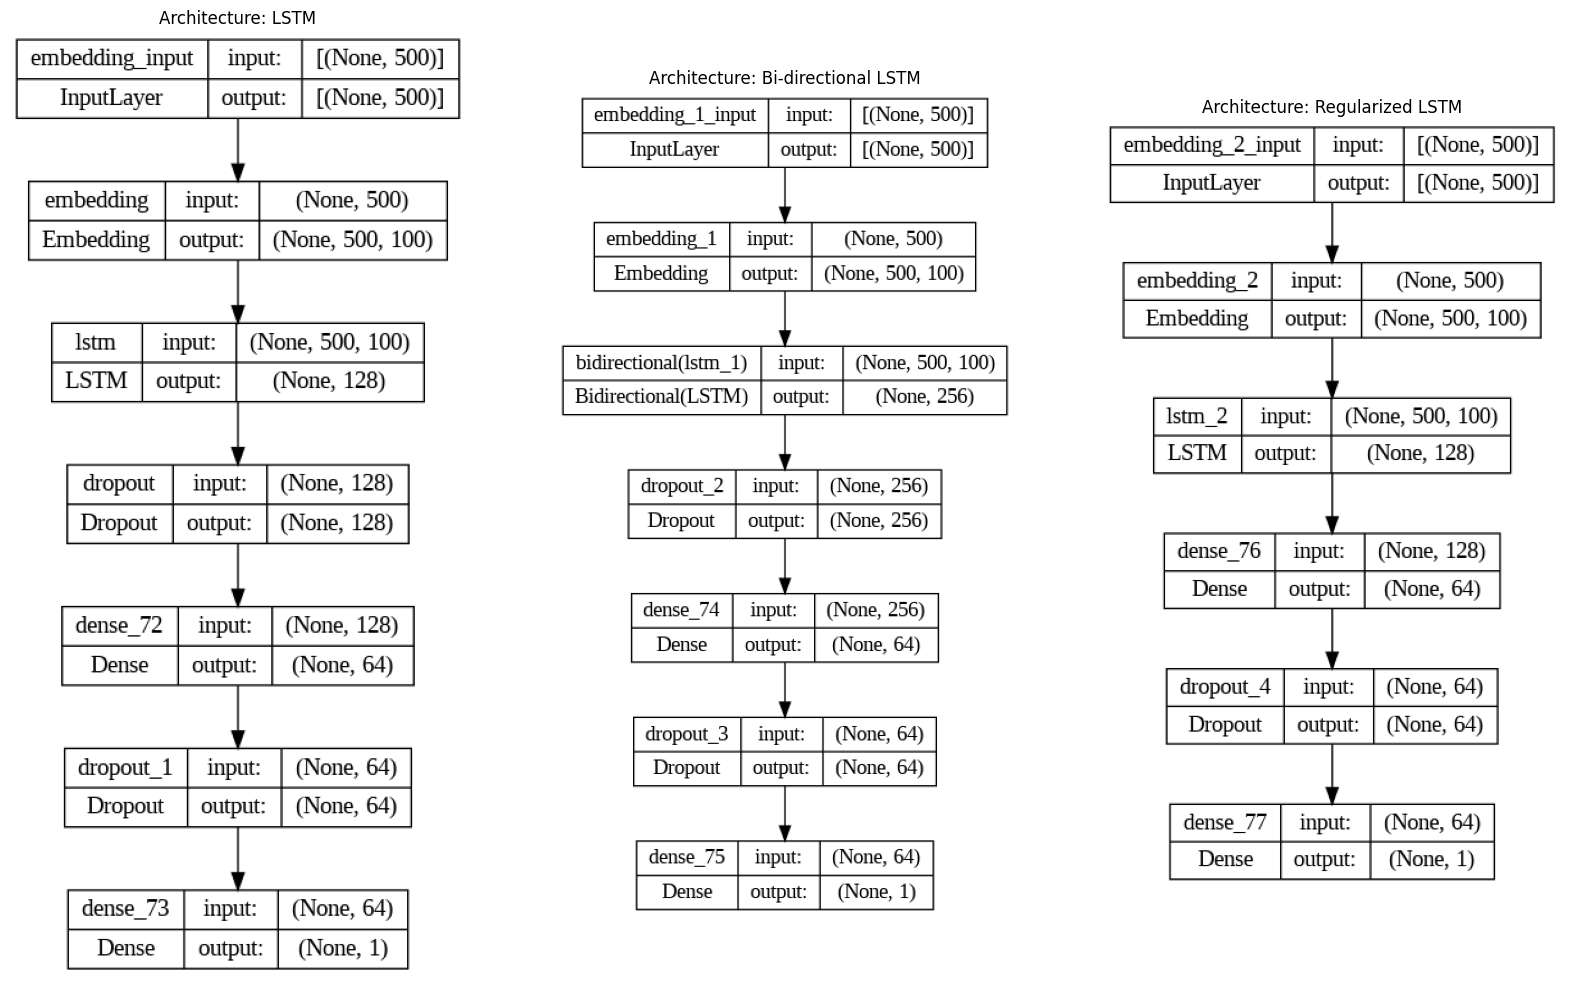

In [36]:
# architechture diagram visualization
from IPython.display import Image, display
from IPython.display import clear_output
from matplotlib import pyplot as plt
from PIL import Image as PilImage

# Create a list to store image paths
image_paths = [model_architecture['name'] + '.png' for model_architecture in model_architectures]

# Define a function to display list of images
def display_images(images):
    fig = plt.figure(figsize=(20,20))
    ax = []
    for i, image_path in enumerate(images):
        img = PilImage.open(image_path)
        ax.append(fig.add_subplot(1, len(images), i+1))
        ax[-1].set_title("Architecture: "+image_path[:-4])  # remove .png from title
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Call the function
display_images(image_paths)


- The purpose of this visualization is to display the architecture diagrams (images) corresponding to each model architecture in the model_architectures list. It provides a visual representation of the different model architectures used in the project.

In [37]:
# Benchmarking results
df_results

,Model,Loss,Accuracy,Precision,Recall,F1-Score,Report
0,LSTM,0.155101,0.977349,0.931624,0.598901,0.729097,"{'0': {'precision': 0.9788956345764672, 'recal..."
1,Bi-directional LSTM,0.144275,0.968960,0.700565,0.681319,0.690808,"{'0': {'precision': 0.9829361576934392, 'recal..."
2,Regularized LSTM,0.120501,0.975671,0.806452,0.686813,0.741840,"{'0': {'precision': 0.983338205203157, 'recall..."



The performance of three different models: LSTM, Bi-directional LSTM, and Regularized LSTM were compared for the task of text classification. Here's how each model performed:

- LSTM: The LSTM model reported an accuracy of 97.7%, with a loss of 0.1551. The model's precision was 93.16% and recall was 59.9%, leading to an F1-Score of 72.9%. The higher precision suggests that the LSTM model was very reliable when it predicted that a text was fraudulent. However, the lower recall score suggests that it might have missed a considerable number of fraudulent texts.

- Bi-directional LSTM: The Bi-directional LSTM model achieved an accuracy of 96.9%, and a loss of 0.1443. The precision and recall for this model were 70.05% and 68.1% respectively, giving an F1-score of 69.1%. This model balanced precision and recall better than the LSTM model, but had a lower overall accuracy and higher loss.

- Regularized LSTM: The Regularized LSTM model achieved an accuracy of 97.6%, with a loss of 0.1205. Its precision and recall were 80.65% and 68.7% respectively, leading to an F1-score of 74.18%. This suggests that the Regularized LSTM model was quite reliable when predicting a text was fraudulent and also relatively successful in identifying a high number of actual fraudulent texts.

In summary, the LSTM model achieved the highest accuracy, while the Regularized LSTM model provided the best balance between precision and recall, as evidenced by its highest F1-score. 

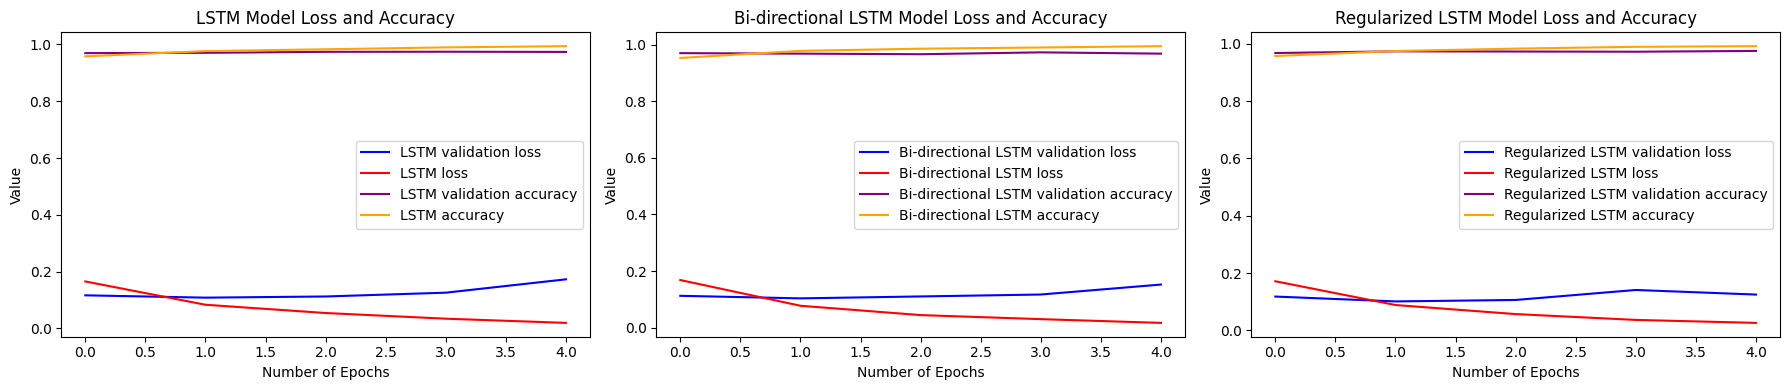

In [38]:
# Plotting loss and accuracy in the same row
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

# Plot LSTM loss and accuracy
axs[0].plot(histories['LSTM'].history['val_loss'], color='b', label="LSTM validation loss")
axs[0].plot(histories['LSTM'].history['loss'], color='red', label="LSTM loss")
axs[0].plot(histories['LSTM'].history['val_accuracy'], color='purple', label="LSTM validation accuracy")
axs[0].plot(histories['LSTM'].history['accuracy'], color='orange', label="LSTM accuracy")
axs[0].set_title("LSTM Model Loss and Accuracy")
axs[0].set_xlabel("Number of Epochs")
axs[0].set_ylabel("Value")
axs[0].legend()

# Plot Bi-directional LSTM loss and accuracy
axs[1].plot(histories['Bi-directional LSTM'].history['val_loss'], color='b', label="Bi-directional LSTM validation loss")
axs[1].plot(histories['Bi-directional LSTM'].history['loss'], color='red', label="Bi-directional LSTM loss")
axs[1].plot(histories['Bi-directional LSTM'].history['val_accuracy'], color='purple', label="Bi-directional LSTM validation accuracy")
axs[1].plot(histories['Bi-directional LSTM'].history['accuracy'], color='orange', label="Bi-directional LSTM accuracy")
axs[1].set_title("Bi-directional LSTM Model Loss and Accuracy")
axs[1].set_xlabel("Number of Epochs")
axs[1].set_ylabel("Value")
axs[1].legend()

# Plot Regularized LSTM loss and accuracy
axs[2].plot(histories['Regularized LSTM'].history['val_loss'], color='b', label="Regularized LSTM validation loss")
axs[2].plot(histories['Regularized LSTM'].history['loss'], color='red', label="Regularized LSTM loss")
axs[2].plot(histories['Regularized LSTM'].history['val_accuracy'], color='purple', label="Regularized LSTM validation accuracy")
axs[2].plot(histories['Regularized LSTM'].history['accuracy'], color='orange', label="Regularized LSTM accuracy")
axs[2].set_title("Regularized LSTM Model Loss and Accuracy")
axs[2].set_xlabel("Number of Epochs")
axs[2].set_ylabel("Value")
axs[2].legend()

plt.tight_layout()
plt.show()


-  This above visual representation is of the training progress for each model architecture, allowing for comparison of their performance in terms of loss and accuracy throughout the training process.

**Fine-tuning RoBERTa for Sequence Classification with BERT-based Model**

- For this model we have taken reference from https://towardsdatascience.com/fake-job-classification-with-bert-6575c908a9aa.

- Model and Language: The most prominent difference is that the referenced code snippet is using a custom Bert model (BertBinaryClassifier) implemented with PyTorch, while our code is using the TFRobertaForSequenceClassification model implemented with TensorFlow via the Hugging Face's Transformers library. Roberta model is known to perform better than Bert in certain tasks due to certain optimizations.

- Tokenization: Our code uses the RobertaTokenizer, and we've created a function to handle tokenization of the text, including adding special tokens, padding to a maximum length, and truncation.

- Training Loop: The referenced code uses a manual training loop, explicitly defining each step, while our code uses the high-level fit API provided by Keras. This makes our code more readable and concise.

- Metrics Recording and Results Visualization: In our code, we've included the creation of a DataFrame to store the results of the model. This makes it easy to compare the performance of different models or configurations. However, visualization of metrics like loss and accuracy or confusion matrix, as well as detailed classification report, can be added for more comprehensive reporting.

- Optimizer: The referenced code uses the Adam optimizer with a learning rate of 3e-6, while our code uses Adam with a learning rate of 5e-5. The learning rate impacts the speed and quality of model training.

- Data Handling: The reason for selecting a subset of the data (2000 samples) and implementing data handling steps was due to limited GPU resources and the extended time it took to train and evaluate the model on the entire dataset. By working with a smaller subset, we were able to reduce the computational requirements and significantly decrease the time needed for training and evaluation. This approach allowed us to efficiently utilize the available GPU resources and accelerate the experimentation process.


In [39]:
#Importing necessary libraries
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np


# Set the maximum sequence length
MAX_SEQUENCE_LENGTH = 128

# Adjust subset size as needed
subset_size = 2000 

# Randomly select a subset of data
df_subset = df.sample(subset_size)

# Initializing a tokenizer object 

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

def tokenize(text):
    return tokenizer.encode_plus(text, add_special_tokens=True, max_length=MAX_SEQUENCE_LENGTH, padding='max_length', return_attention_mask=True, truncation=True)

# Tokenize the text data in the subset
X_subset = [tokenize(text) for text in df_subset['text']]
y_subset = df_subset['fraudulent']

# Split the subset into training and testing sets
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset, y_subset, test_size=0.2)

# Convert the input data to numpy arrays
X_train_subset = np.array([x['input_ids'] for x in X_train_subset])
X_test_subset = np.array([x['input_ids'] for x in X_test_subset])
y_train_subset = np.array(y_train_subset)
y_test_subset = np.array(y_test_subset)

# Create the Roberta model
model = TFRobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)

# Define the optimizer with a lower learning rate
optimizer = Adam(learning_rate=5e-5)

# Compile and train the model on the subset data
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train_subset, y_train_subset, epochs=4, batch_size=16, validation_data=(X_test_subset, y_test_subset))  # Increased epochs and batch size

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_subset, y_test_subset)

# Print the evaluation results
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Create a DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'Loss', 'Accuracy'])

# Append the Roberta results to the DataFrame
results = results.append({'Model': 'Roberta', 'Loss': loss, 'Accuracy': accuracy}, ignore_index=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

Epoch 1/4
100/100 [==============================] - 2408s 24s/step - loss: 0.7906 - accuracy: 0.9444 - val_loss: 0.7712 - val_accuracy: 0.9500
Epoch 2/4
100/100 [==============================] - 2340s 23s/step - loss: 0.7905 - accuracy: 0.9475 - val_loss: 0.7712 - val_accuracy: 0.9500
Epoch 3/4
100/100 [==============================] - 2345s 23s/step - loss: 0.7905 - accuracy: 0.9488 - val_loss: 0.7712 - val_accuracy: 0.9500
Epoch 4/4
13/13 [==============================] - 168s 13s/step - loss: 0.7712 - accuracy: 0.9500
Test Loss: 0.771247386932373
Test Accuracy: 0.949999988079071


<ipython-input-39-0b5ab63fded3>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': 'Roberta', 'Loss': loss, 'Accuracy': accuracy}, ignore_index=True)


In [42]:
# Displaying results
results

,Model,Loss,Accuracy
0,Roberta,0.771247,0.95


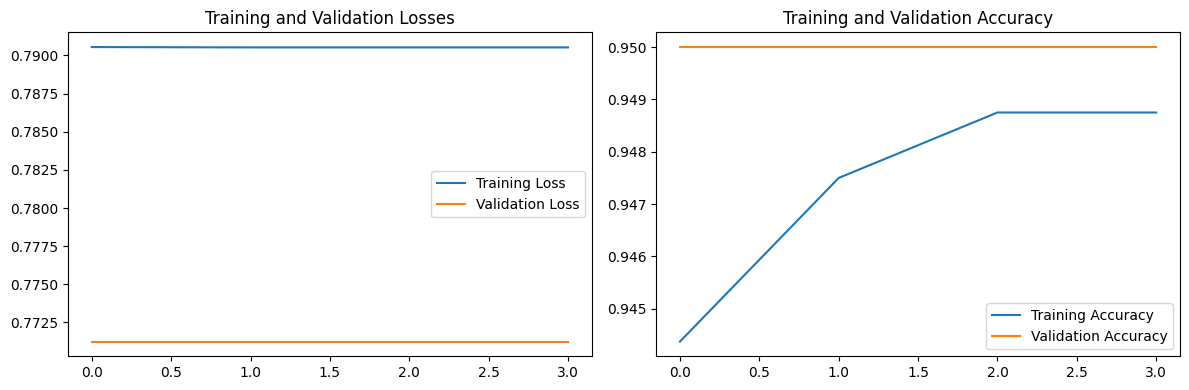

In [44]:
# Plotting the training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Losses')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()


**Conclusion**
- The model has achieved a test accuracy of 95%, which is impressive given the complexity of text classification tasks. However, there are several factors that could have contributed to the model's performance that deserve further examination.

- Firstly, the dataset used in this project is significantly imbalanced. It consists of 17,014 real job postings and only 865 fraudulent ones. This imbalanced distribution of classes can skew the model's performance towards the majority class, leading to a high overall accuracy but potentially poorer performance in accurately identifying the minority class (fraudulent job postings).

- Secondly, due to GPU limitations, only a subset of the data was used for model training and evaluation. While this approach enables the model to be trained within the resource constraints, it could also limit the model's ability to generalize well to unseen data. This is because the model might not have been exposed to the complete variability and nuances present in the full dataset during training.

- In conclusion, the model's 95% accuracy showcases the strength of the Roberta architecture in handling text classification tasks. However, to improve the model's performance further, especially in identifying fraudulent job postings, it would be beneficial to address the class imbalance in the dataset and to train the model on the full dataset when more computational resources are available.
 
- This project serves as a valuable step towards effectively identifying fraudulent job postings, which can have significant real-world impacts by protecting job seekers from potential scams.






